<div class="alert alert-info" style="background-color: lightgray;">
    <h1>
        <center>
        <font size="8"><strong> Car Insurance Claim Prediction <font>
        </center>
    </h1>
</div>
<hr/>

## Task and Motivation
Developing a predictive model that can assess and predict the likelihood of a policyholder filing a claim for their car insurance. This initiative aims to assist insurance companies in making informed decisions on whether to provide insurance to a specific customer, taking into account their individual circumstances. The overarching goal is to maximize profitability by identifying and managing potential risks associated with each policyholder.

## Dataset
Dataset  can be found through this [link](https://www.kaggle.com/sagnik1511/car-insurance-data ).
Certainly! Here's a joined version for your task and motivation:

# **Importing Modules and Configuration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import math
import missingno as msno

from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading and Peeking at The Dataset

In [4]:
drive_path = "/content/drive/MyDrive/Colab Notebooks/project/Car_Insurance_Claim.csv"
dataset = pd.read_csv(drive_path, sep=',', index_col= None)

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


## Dataset Description

The dataset comprises **10K** entries documenting individuals' car insurance claims, with each entry containing a set of **19** columns.

- `ID`: An exclusive identification number given to the customer by the company (_numerical_)

- `AGE`: The customer's age depicted in textual form (_categorical_)

- `GENDER`: The customer's biological gender (_binary categorical_)

- `RACE`: Details about the customer's racial background (_binary categorical_)

- `DRIVING_EXPERIENCE`: The period of time the individual has been accumulating driving experience (_categorical_)

- `EDUCATION`: The customer's highest attained level of education (_categorical_)

- `INCOME`: The financial class of the customer (_categorical_)

- `CREDIT_SCORE`: The likelihood of a customer submitting an insurance claim during the coverage period (_numerical continuous_)

- `VEHICLE_OWNERSHIP`: Whether the customer possesses ownership of the car or not (_binary numerical_)

- `VEHICLE_YEAR`: The estimated year the car was manufactured (_categorical_)

- `MARRIED`: The marital status of the customer (_binary numerical_)

- `CHILDREN`: Whether the customer has a child or not (_binary numerical_)

- `POSTAL_CODE`: The postal code of the customer's residence (_numerical_)

- `ANNUAL_MILEAGE`: The distance covered by the customer in a year, expressed in kilometers (_numerical continuous_)

- `VEHICLE_TYPE`: The classification of the customer's car (_binary categorical_)

- `SPEEDING_VIOLATIONS`: The count of speeding infractions by the customer (_numerical_)

- `DUIS`: The number of the times where the customer was apprehended for driving under the influence (_numerical_)

- `PAST_ACCIDENTS`: The count of previous accidents involving the customer (_numerical_)

- `Outcome`: Whether the customer has made an insurance claim for their loan or not


## Dataset Structure

In [ ]:
row_number, col_number = dataset.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset contains \'{col_number}\' columns')

The dataset contains '10000' rows.
The dataset contains '19' columns


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

**Summary Statistics** of the numerical variables in our dataset

In [ ]:
dataset.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Summary statistics of the dataset.

## Dataset Categorization

,Column Title
0,AGE
1,GENDER
2,RACE
3,DRIVING_EXPERIENCE
4,EDUCATION
5,INCOME
6,VEHICLE_YEAR
7,VEHICLE_TYPE


,Column Title
0,ID
1,CREDIT_SCORE
2,VEHICLE_OWNERSHIP
3,MARRIED
4,CHILDREN
5,POSTAL_CODE
6,ANNUAL_MILEAGE
7,SPEEDING_VIOLATIONS
8,DUIS
9,PAST_ACCIDENTS


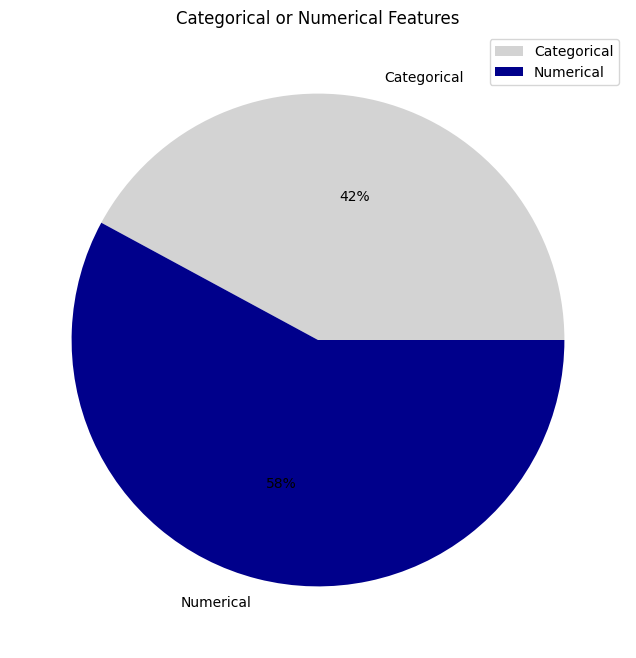

In [ ]:
def List_Table(L):
    Table = pd.DataFrame({'Column Title': L})
    Table_styled = Table.style.set_properties(**{'font-size': '10pt','border': '1.3px solid black', 'color':'darkblue'})
    return Table_styled



categorical = [col for col in dataset.columns if dataset[col].dtypes == "object"] # extracting only the columns whose dtype is Object
display(List_Table(categorical).set_caption('Categorical Features:'))
print('\n')


numerical = [col for col in dataset.columns if dataset[col].dtypes != "object"] # extracting only the columns whose dtype is Numeric/Float in our case
display(List_Table(numerical).set_caption('Numerical Features:'))
print('\n\n')


fig, ax = plt.subplots(figsize=(12, 8))
colors = ['lightgray' , 'darkblue']
# making a pie chart to show the ratio between Number of Categorical and Numerical present in our dataset.
ax.pie([len(categorical), len(numerical)], labels =['Categorical', 'Numerical'], wedgeprops={'width':1}, startangle=0, autopct = '%1.0f%%', colors=colors)
ax.legend(loc = 'best')
plt.title('Categorical or Numerical Features')
plt.show()




## Distribution of Target Value

In [ ]:
print(dataset['OUTCOME'].value_counts()) # the dataset is imbalanced !!!

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64


## Distribution of Each Column

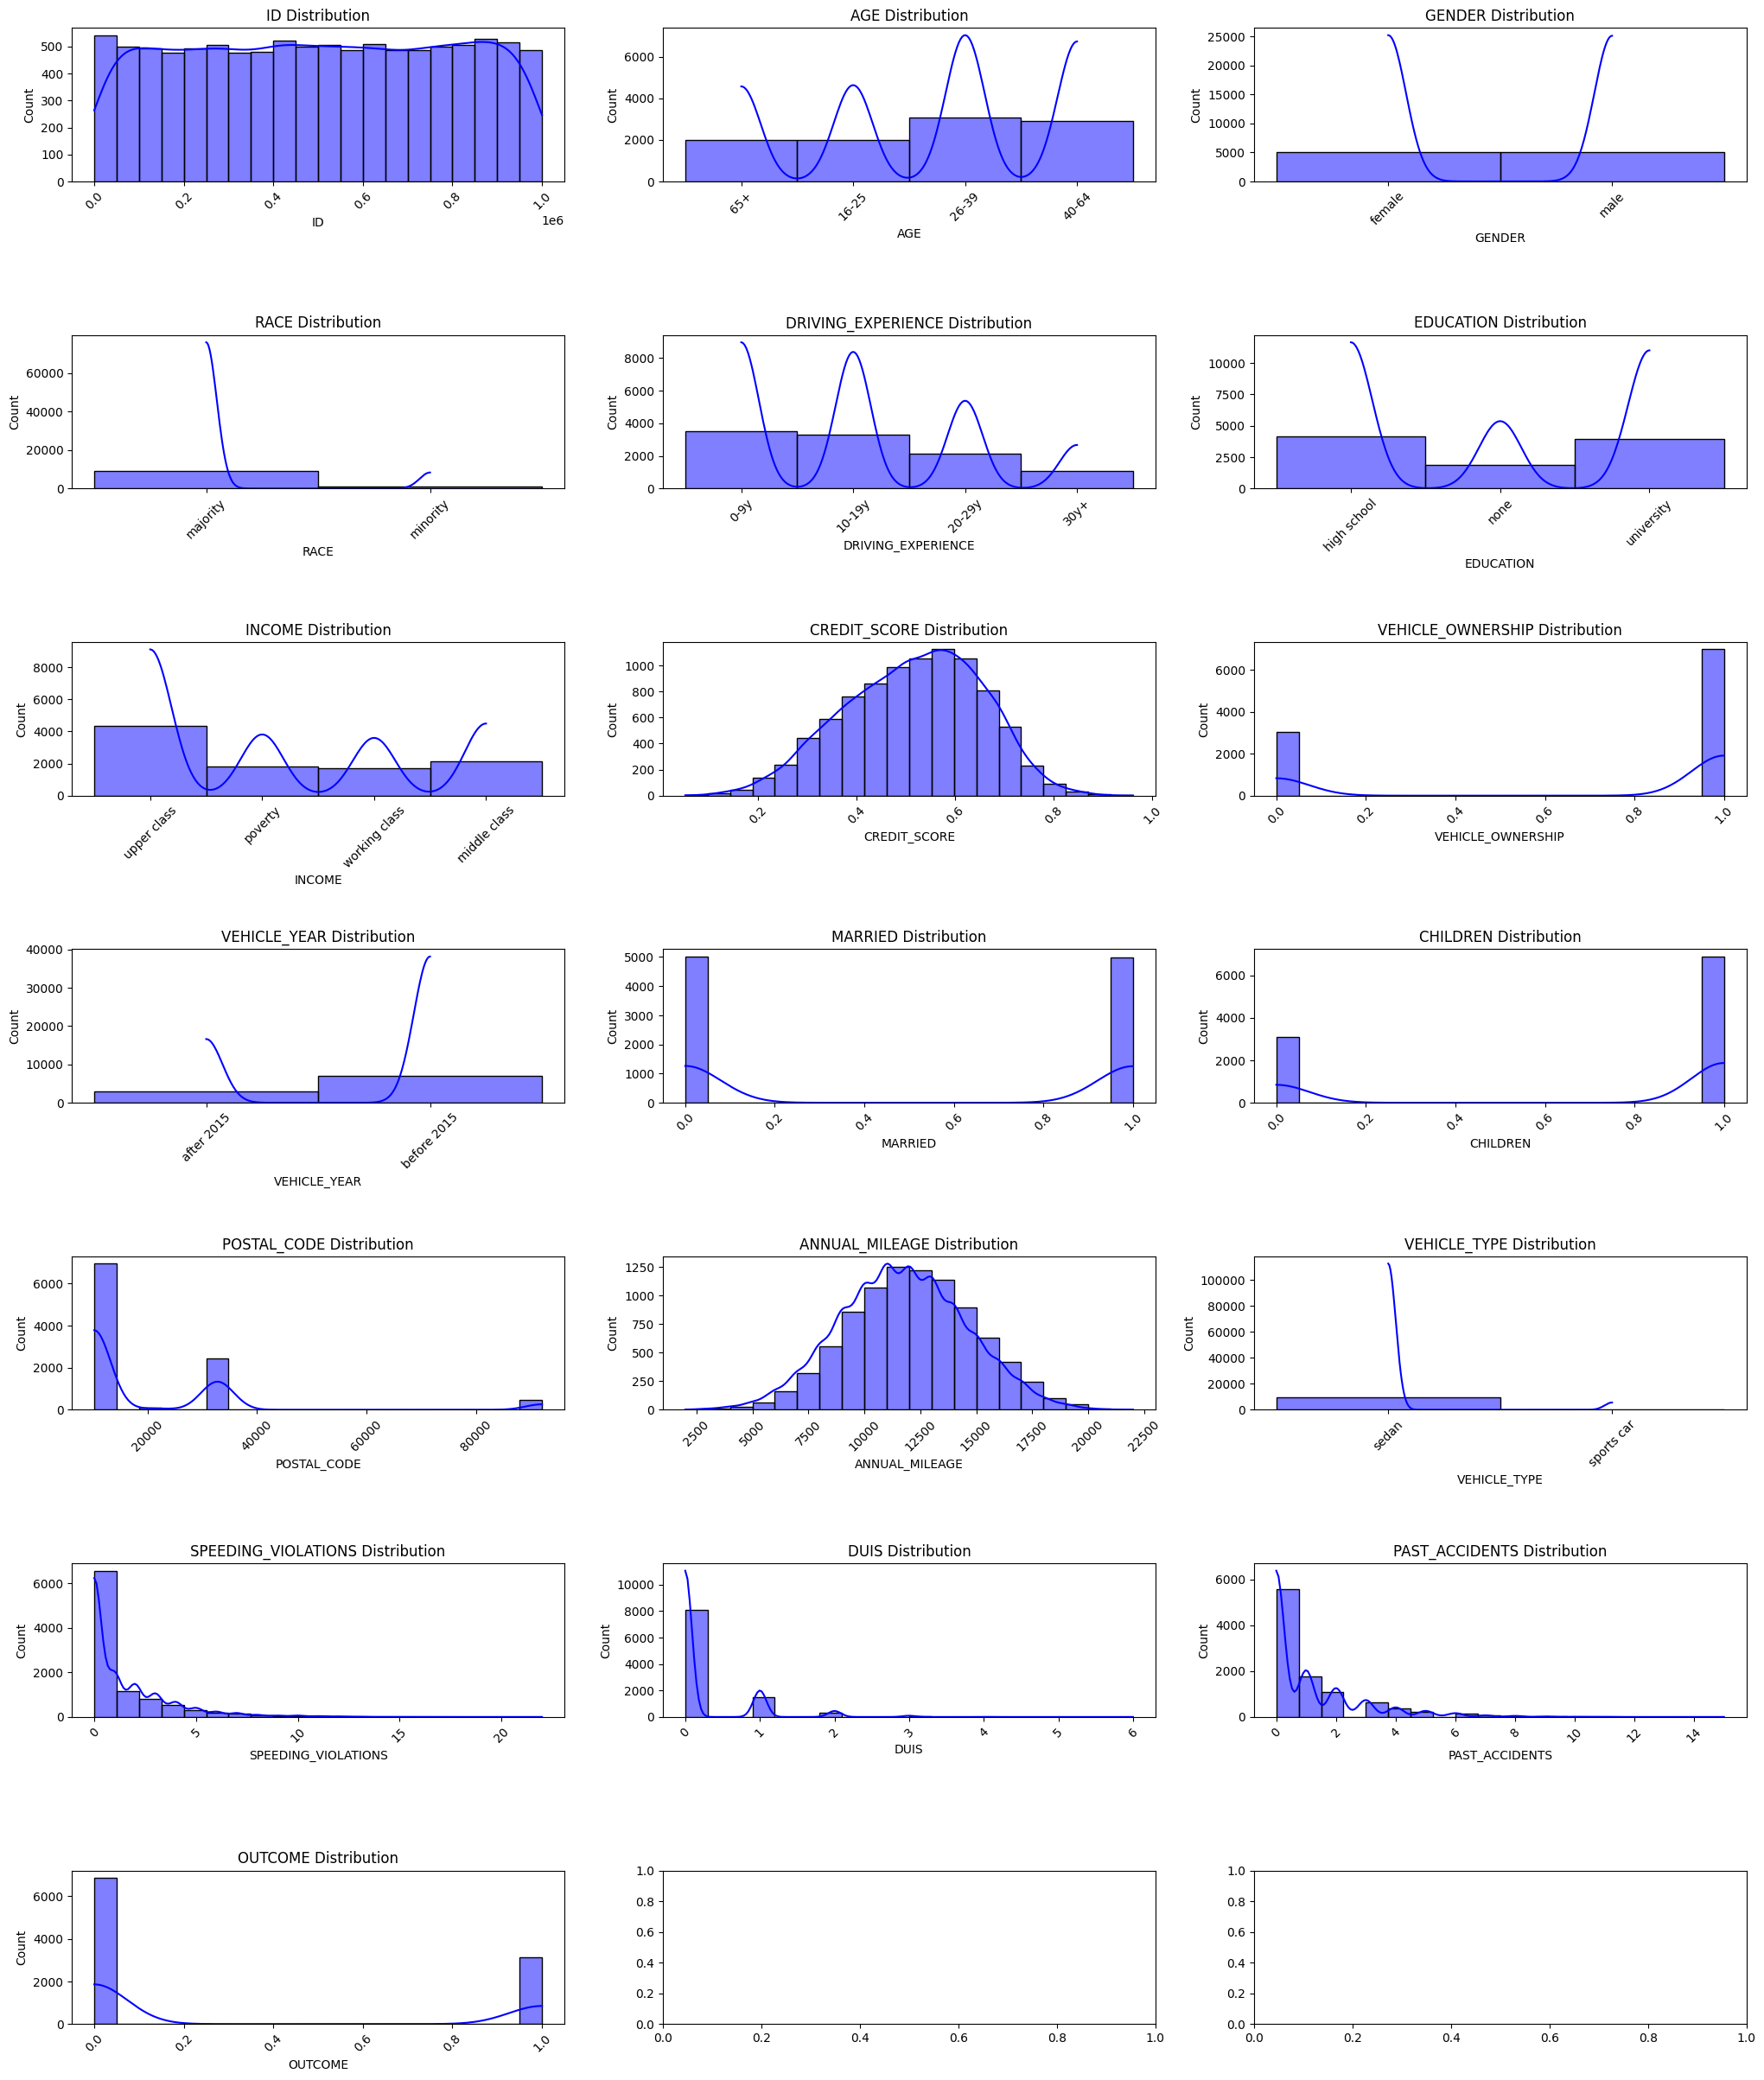

In [ ]:
num_columns = len(dataset.columns)
num_rows = math.ceil(num_columns / 3)
num_cols = min(3, num_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 30))
fig.subplots_adjust(hspace=1)
sns.set_palette("husl")

for index, column in enumerate(dataset.columns):
    row, col = divmod(index, num_cols)
    ax = axes[row, col]
    sns.histplot(dataset[column], bins=20, ax=ax, kde=True, color = (0,0,1))
    ax.set_title(column + " Distribution", color='black')
    ax.tick_params(axis='x', rotation=45)

plt.show()

****Observing the plots above allows us to make the following observations:****
- The 'CREDIT_SCORE' and 'ANNUAL_MILEAGE' features exhibit a normal distribution.
- 'RACE', 'VEHICLE_YEAR', 'VEHICLE_OWNERSHIP', 'OUTCOME', and 'VEHICLE_TYPE' features appear to be significantly unbalanced; their impact on the outcome will be explored further.
- 'SPEEDING_VIOLATIONS' and 'PAST_ACCIDENTS' features show positive skewness.
- The remaining features can be considered balanced.

## Preprocessing

#### Duplicate and missing values

In [ ]:
dataset[dataset.duplicated()].sum()

ID                     0.0
AGE                    0.0
GENDER                 0.0
RACE                   0.0
DRIVING_EXPERIENCE     0.0
EDUCATION              0.0
INCOME                 0.0
CREDIT_SCORE           0.0
VEHICLE_OWNERSHIP      0.0
VEHICLE_YEAR           0.0
MARRIED                0.0
CHILDREN               0.0
POSTAL_CODE            0.0
ANNUAL_MILEAGE         0.0
VEHICLE_TYPE           0.0
SPEEDING_VIOLATIONS    0.0
DUIS                   0.0
PAST_ACCIDENTS         0.0
OUTCOME                0.0
dtype: float64

As observed above, there are **no** duplicate records in the dataset.

In [5]:
missing_values = dataset.columns[dataset.isnull().any()]
print('List of columns with null values:')
print(dataset[missing_values].isnull().sum())

List of columns with null values:
CREDIT_SCORE      982
ANNUAL_MILEAGE    957
dtype: int64


As observed above, there are 982 missing values in the **'CREDIT_SCORE'** column and 957 in the **'ANNUAL_MILEAGE'** column.

#### Visualization of the null values throughout the the two columns of the dataset:

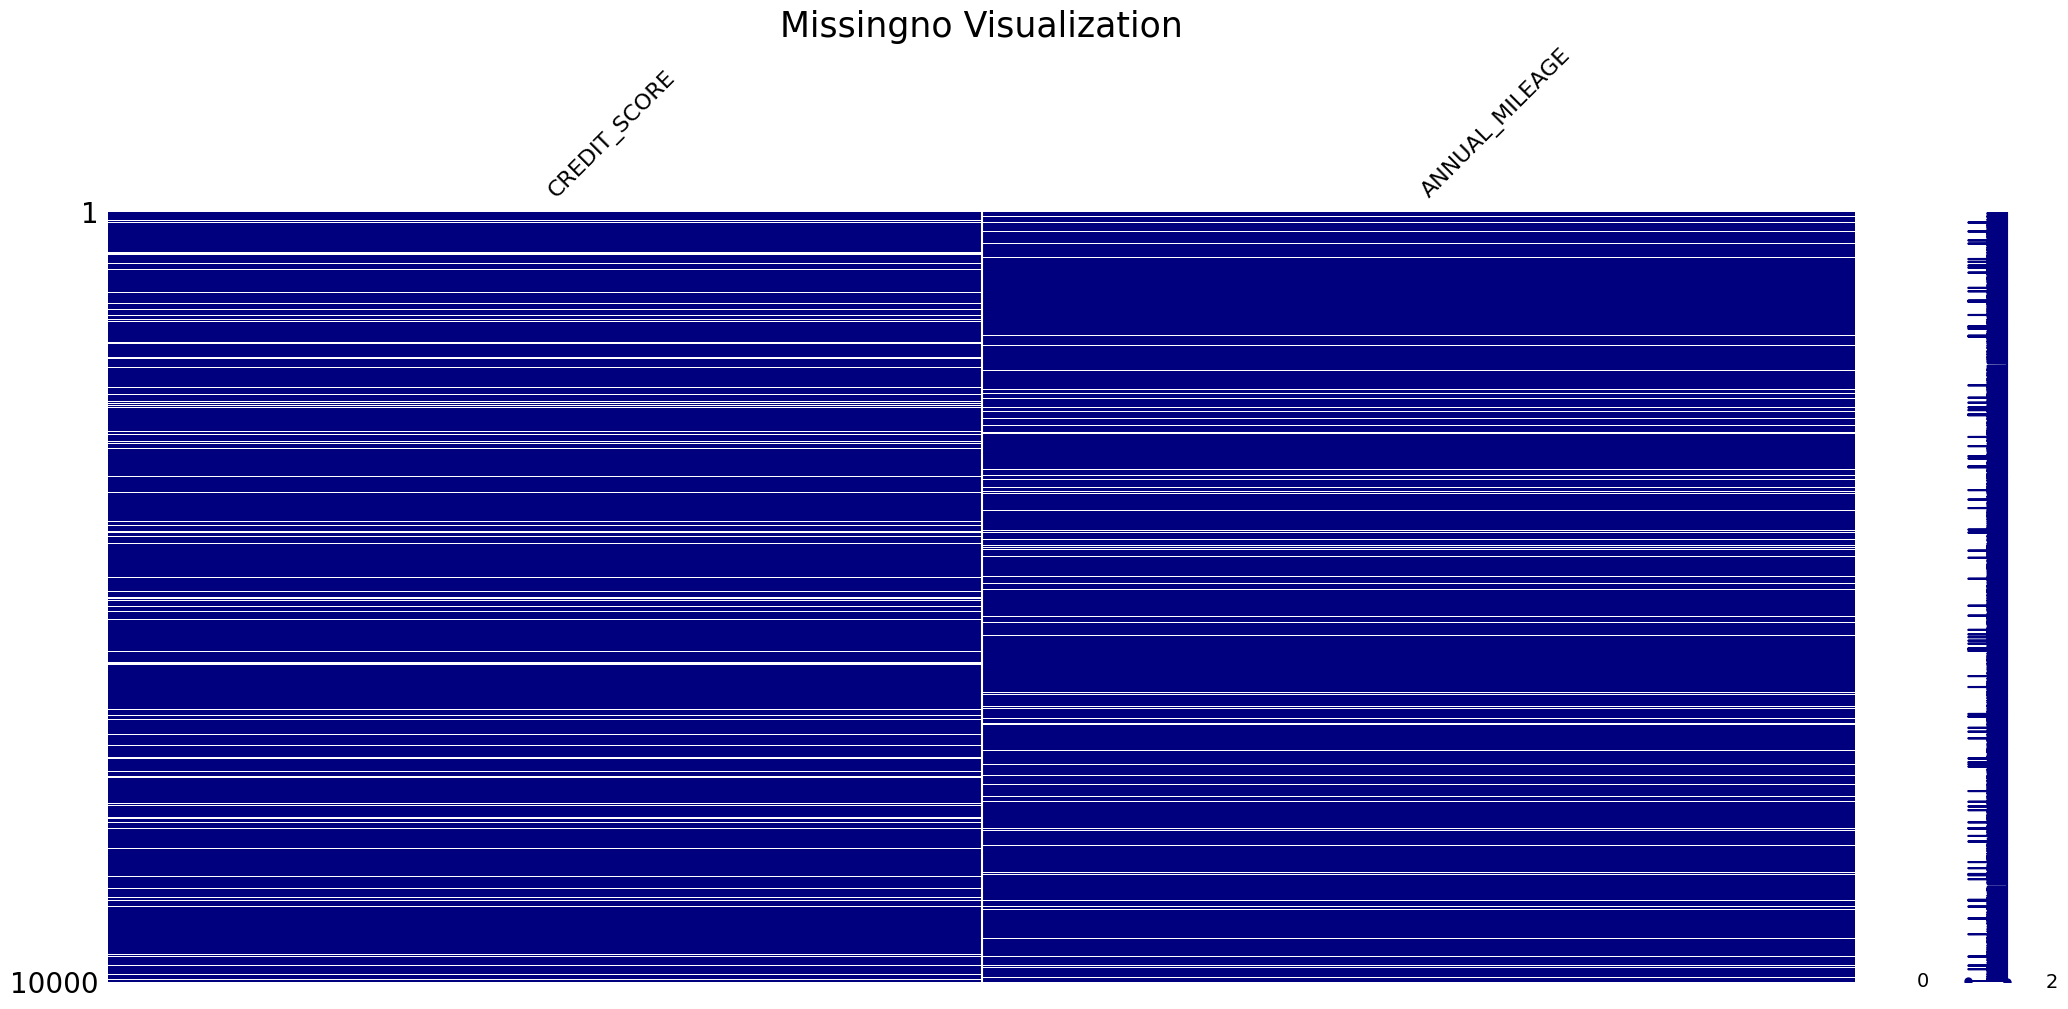

In [6]:
msno.matrix(dataset[(missing_values)], color = (0,0,0.5))
plt.title('Missingno Visualization', fontsize=25);

## Dealing with missing values  

As the two columns, "CREDIT_SCORE" and "ANNUAL MILEAGE", appears to be distributed normally (see the histograms section), we will impute the missing values with the mean of the respective column values.

In [7]:
# maximum percentage of values that are null in the dataset:
max_percentage = max(dataset.isnull().sum())/len(dataset) * 100
print(f"Percentage (maximum) of null values in our dataset {max_percentage}%")

Percentage (maximum) of null values in our dataset 9.82%


In [8]:
dataset_impute = dataset.copy()

### **Imputation**
Replace the missing values by inserting the mean of the values in **'CREDIT_SCORE'** and **'ANNUAL_MILEAGE'** columns.

In [9]:
imputation = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_temp = imputation.fit_transform(dataset_impute[missing_values])
dataset_impute[missing_values] = imputed_temp

Now we will check how are the results after performing imputation on these two columns.


In [10]:
dataset_impute.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

From the outcomes presented above, it is evident that no records were omitted; rather, all missing values were addressed and filled (imputed).

In [11]:
dataset_impute.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [12]:
dataset = dataset_impute.copy()

Since the **'ID'** column does not influence our target feature, we will exclude this column from the dataset.

In [13]:
dataset.drop(columns = ['ID'], axis = 1, inplace = True)

 ## Distribution of Categorical Features with respect to the target variable ('OUTCOME')

In [14]:
def plot_features_wrt_target(df, columns, n_cols=2, custom_palette=None):
    fig, axes = plt.subplots(1, n_cols, figsize=(17, 9))
    for index, column in enumerate(columns):
        ax = sns.countplot(x='OUTCOME', hue=column, ax=axes[index],data=df,palette=custom_palette)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        for p in ax.patches:
            percentage = round((p.get_height() / len(df) * 100), 1)
            txt = f"{percentage}%"
            txt_x = p.get_x()
            txt_y = p.get_height() + 30
            ax.text(txt_x, txt_y, txt)
    fig.tight_layout(pad=1.5)
    plt.show()

##### **'AGE'** and **'GENDER'** wrt **'OUTCOME'**

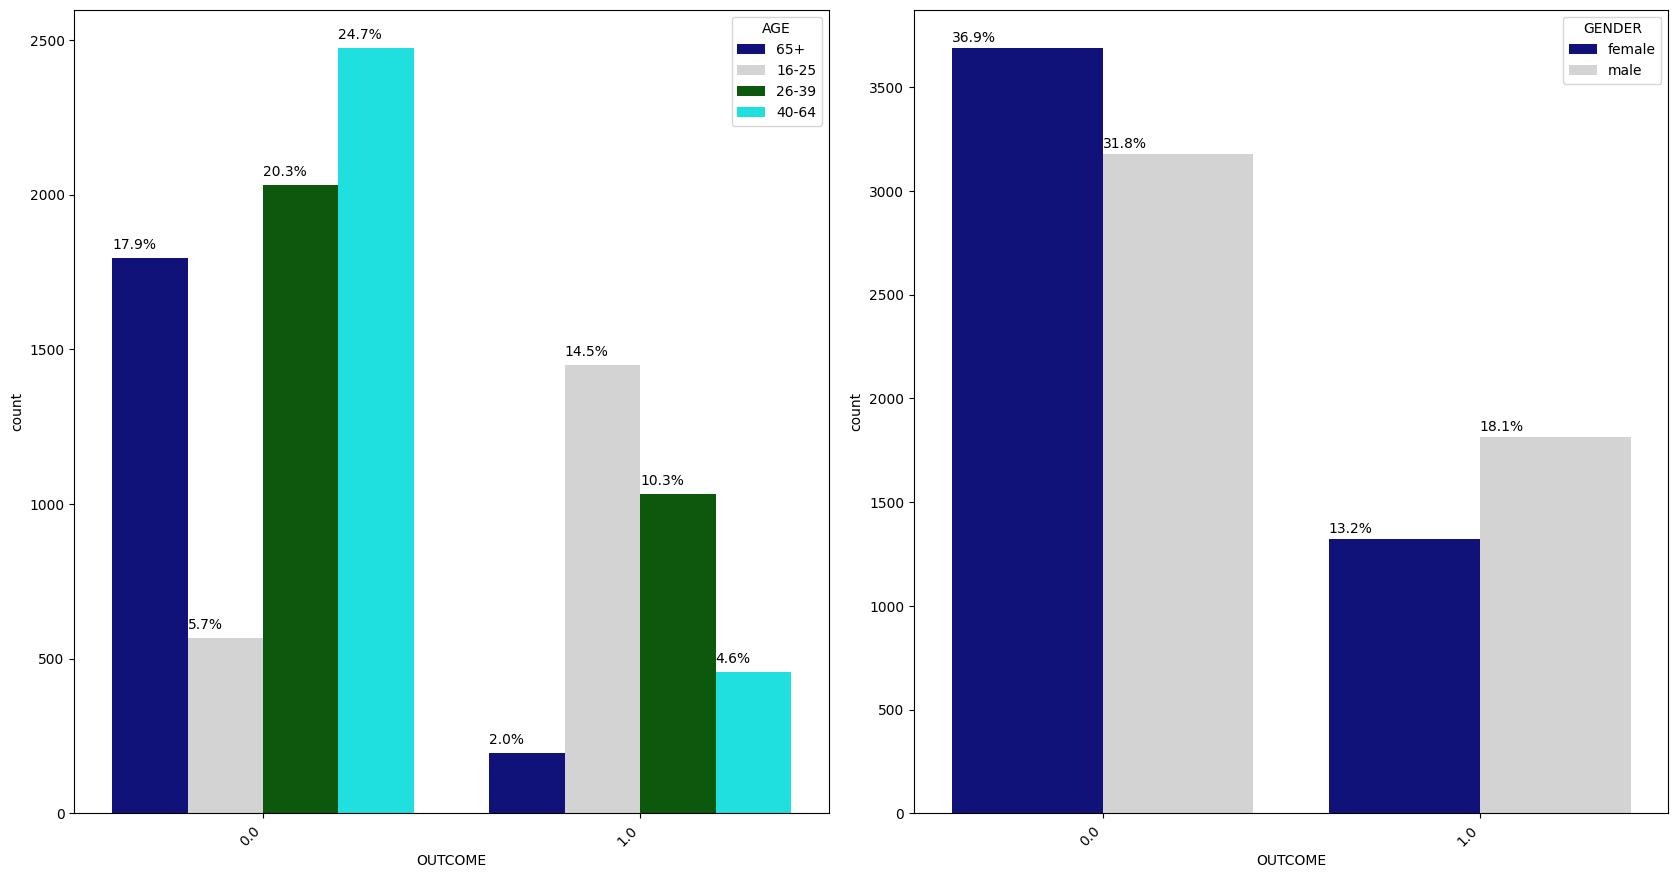

In [ ]:
custom_palette = ['darkblue', 'lightgray', 'darkgreen', 'cyan']
plot_features_wrt_target(dataset, categorical[0:2], custom_palette=custom_palette)

**AGE:**
- It is apparent that among the various age groups in our dataset, individuals within the **16-25** range exhibit a higher tendency to file insurance claims compared to other age brackets. Conversely, this pattern is entirely reversed for individuals over the age of **65**. Despite the **16-25** age range being the second-least represented in the overall **AGE** distribution, it paradoxically comprises the highest number of insurance claims.

**GENDER:**
- As previously noted, the distribution of **GENDER** appears to be well-balanced. However, upon closer inspection of the plot, it becomes evident that the proportion of insurance claims made by **Males** surpasses that of **Females**.

##### **'DRIVING_EXPRIENCE'** and **'EDUCATION'**  wrt 'OUTCOME'

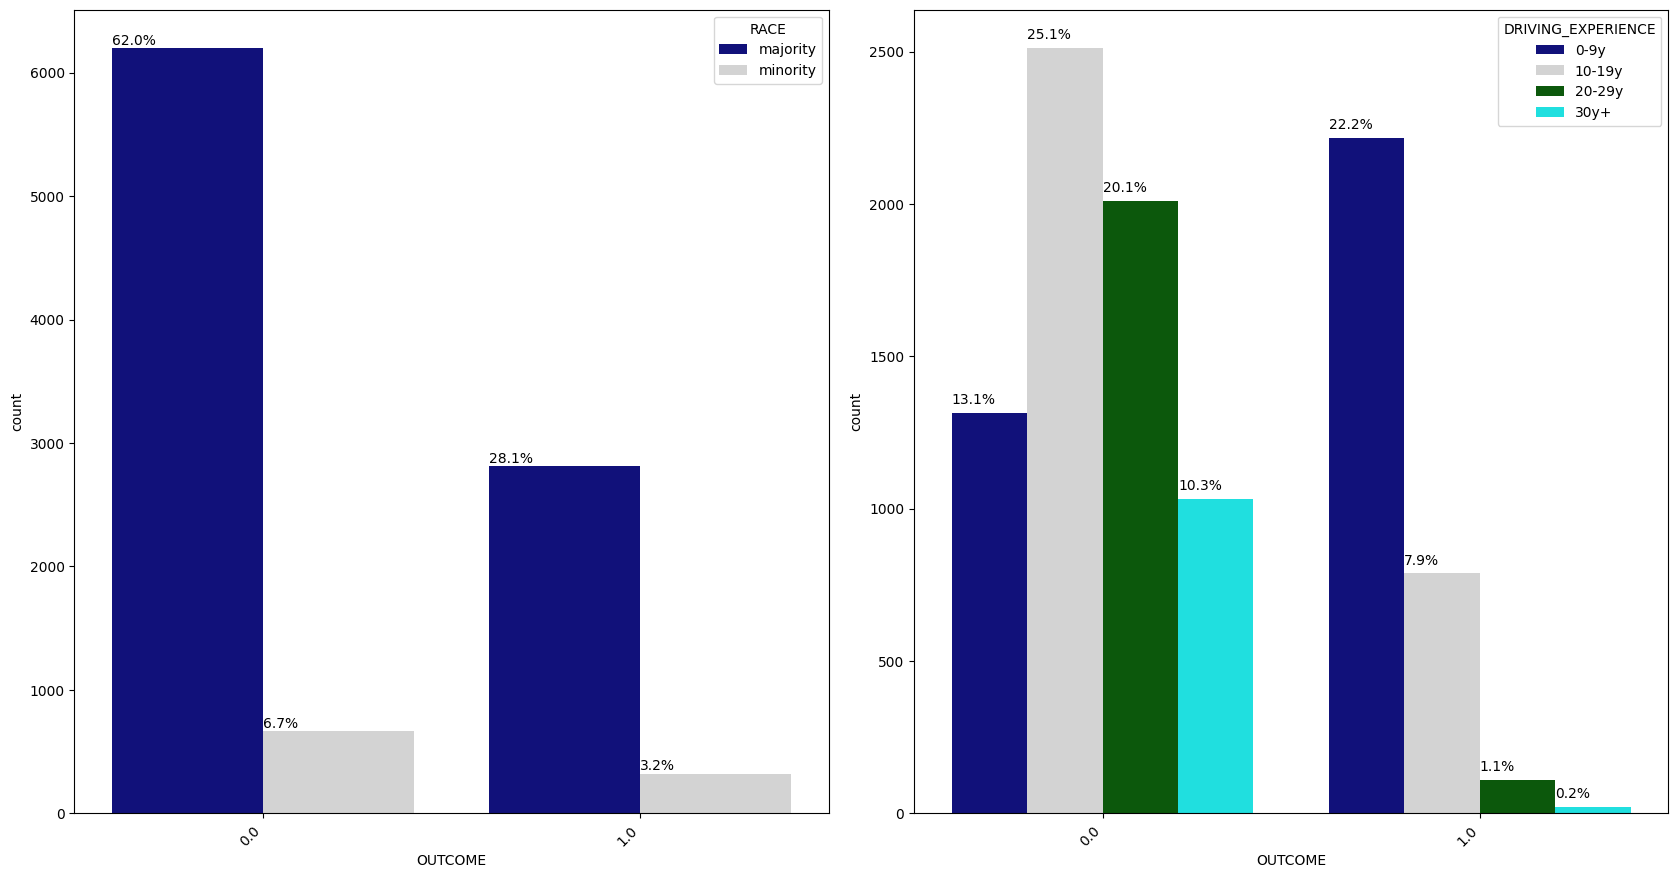

In [ ]:
plot_features_wrt_target(dataset, categorical[2:4], custom_palette=custom_palette)

**Driving Experience:**
   - Across different driving experience groups, a higher number of insured individuals did not claim insurance, except for the group with **0-9 years** of experience.
   - Individuals with more than 10 years of driving experience are less likely to make insurance claims.
   - The group with 0-9 years of driving experience shows the highest tendency to claim insurance, while those with over 30 years of experience display the lowest inclination.

**Education:**
   - In all education groups, the majority of individuals did not claim insurance.
   - The distribution is balanced for individuals without any educational qualification, whereas other groups show an imbalance, with more individuals not claiming compared to those who do.

##### '**INCOME'** and **'VEHICLE_YEAR'** wrt 'OUTCOME'

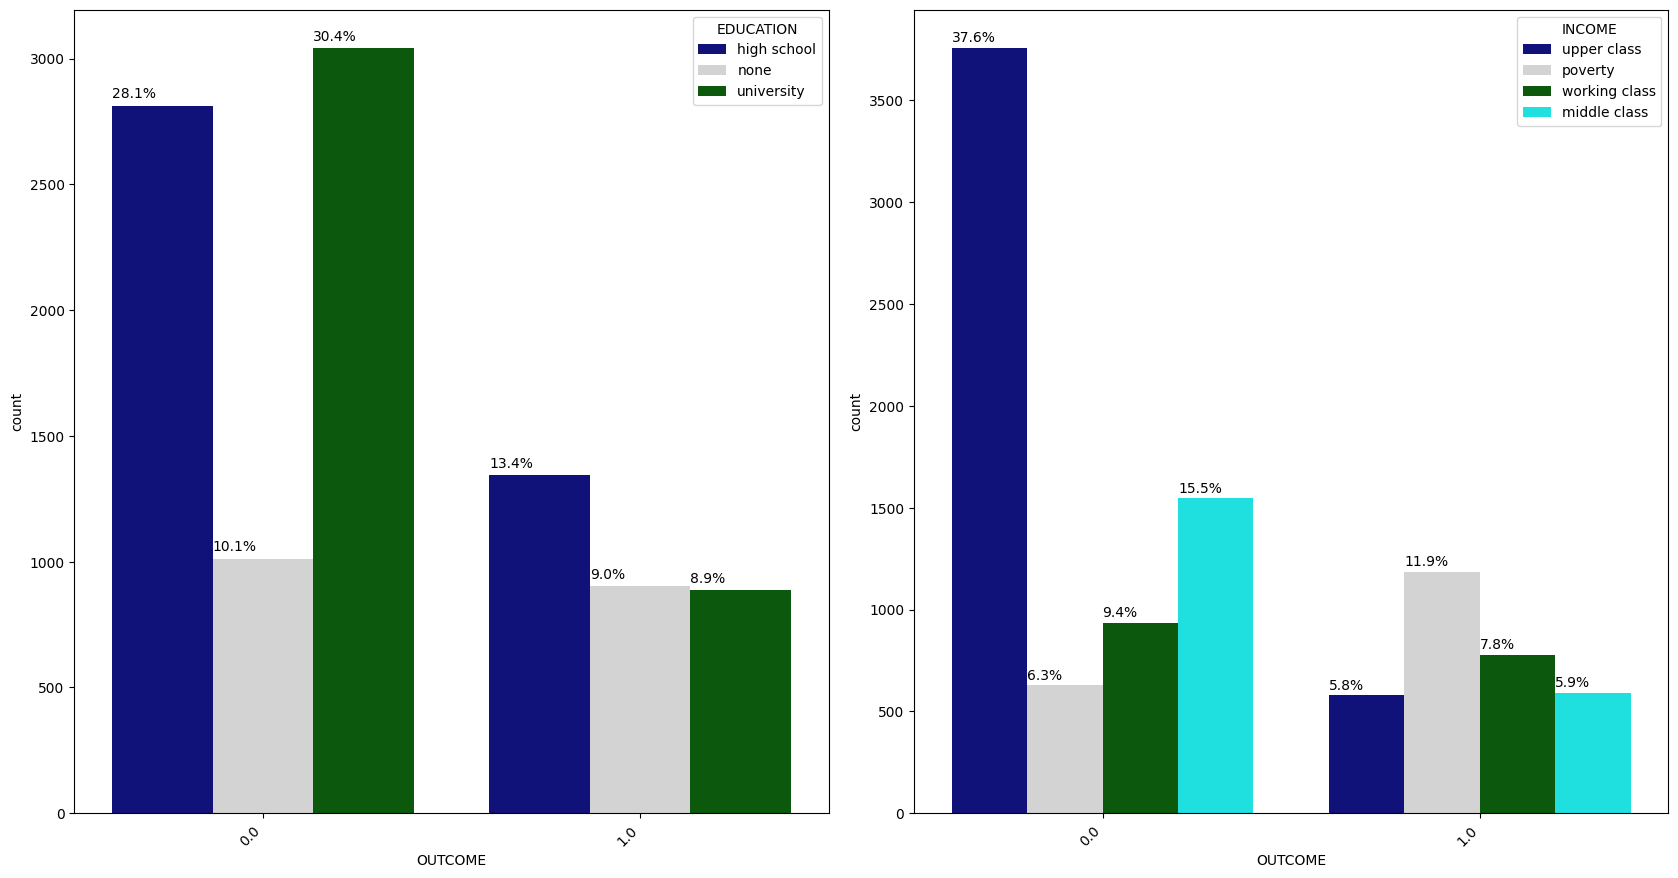

In [ ]:
plot_features_wrt_target(dataset, categorical[4:6], custom_palette=custom_palette)

**INCOME:**
- Across various income groups in the distribution, the count of insured individuals who did not claim insurance is higher than those who claimed, except for individuals in a **Poverty** situation.
- Approximately 86% of the upper-class individuals did not claim insurance.
- Despite forming 44% of the distribution, the upper-class group has the second-lowest count of individuals who did not claim insurance.
- **Poverty** emerges as a significant determinant, with 67% of individuals in this group making insurance claims.

**VEHICLE_YEAR:**
- In both groups of insured individuals (those with cars before and after 2015), the count of individuals claiming insurance is lower than those who haven't claimed.
- Within these two groups, individuals with cars produced **before 2015** are more inclined to claim insurance than those with cars produced **after 2015**. Additionally, the distribution of vehicle types indicates a higher count of individuals with cars produced **before 2015**.

### '**VEHICLE_TYPE'** and **'RACE'**  wrt 'OUTCOME'

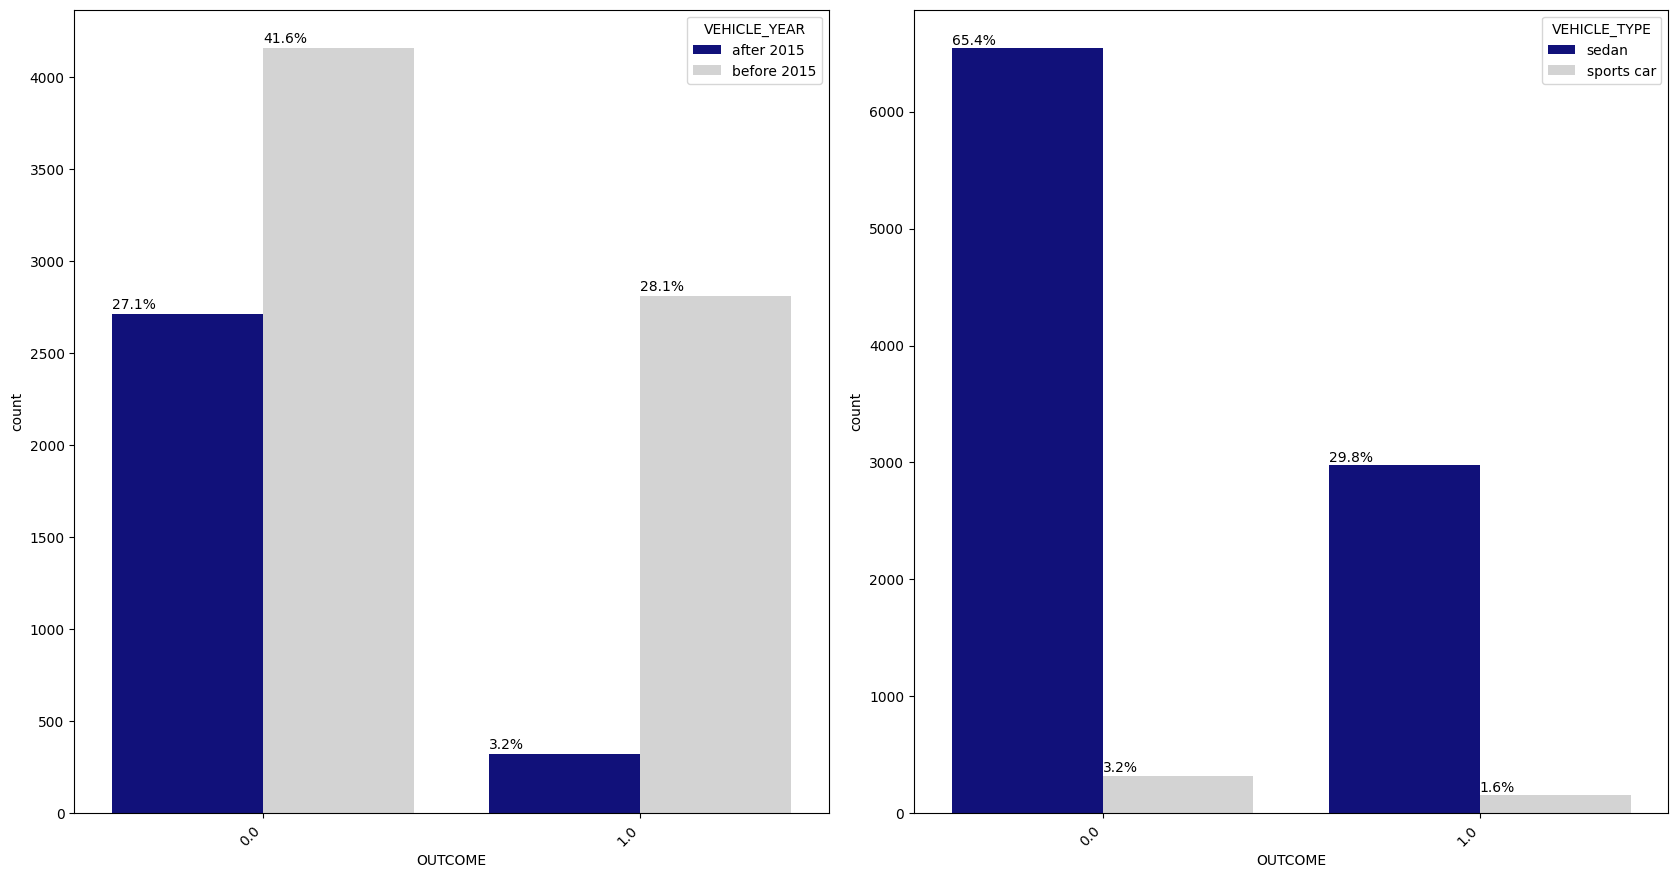

In [ ]:
plot_features_wrt_target(dataset, categorical[6:8], custom_palette=custom_palette)

**VEHICLE_TYPE**:
- In both categories of insured individuals (those with Sedan or Sport cars), the count of individuals who have claimed their insurance is lower than those who have not.

**RACE**:
- As observed in the histogram above, within both groups of insured individuals (majority and minority), the number of individuals claiming insurance is lower than those who have not claimed.

**considering both features:**
- Given that the distribution of individuals who have claimed or not claimed is balanced across all possible values of these features, we can conclude that these two features are not discriminative. In other words, they do not provide significant predictive information when encountering new samples.   
   
   

* **NOTE:** We can see that in these two features, **one value doesn't participate much enough** to distinquish between the two classes of our target. We will make a decision about whether having or dropping these features after checking their correlation with the outcome.

## Distribution of Binary Numerical Features with respect to the target variable

In [ ]:
binary_numerical = ['MARRIED', 'CHILDREN', 'VEHICLE_OWNERSHIP']

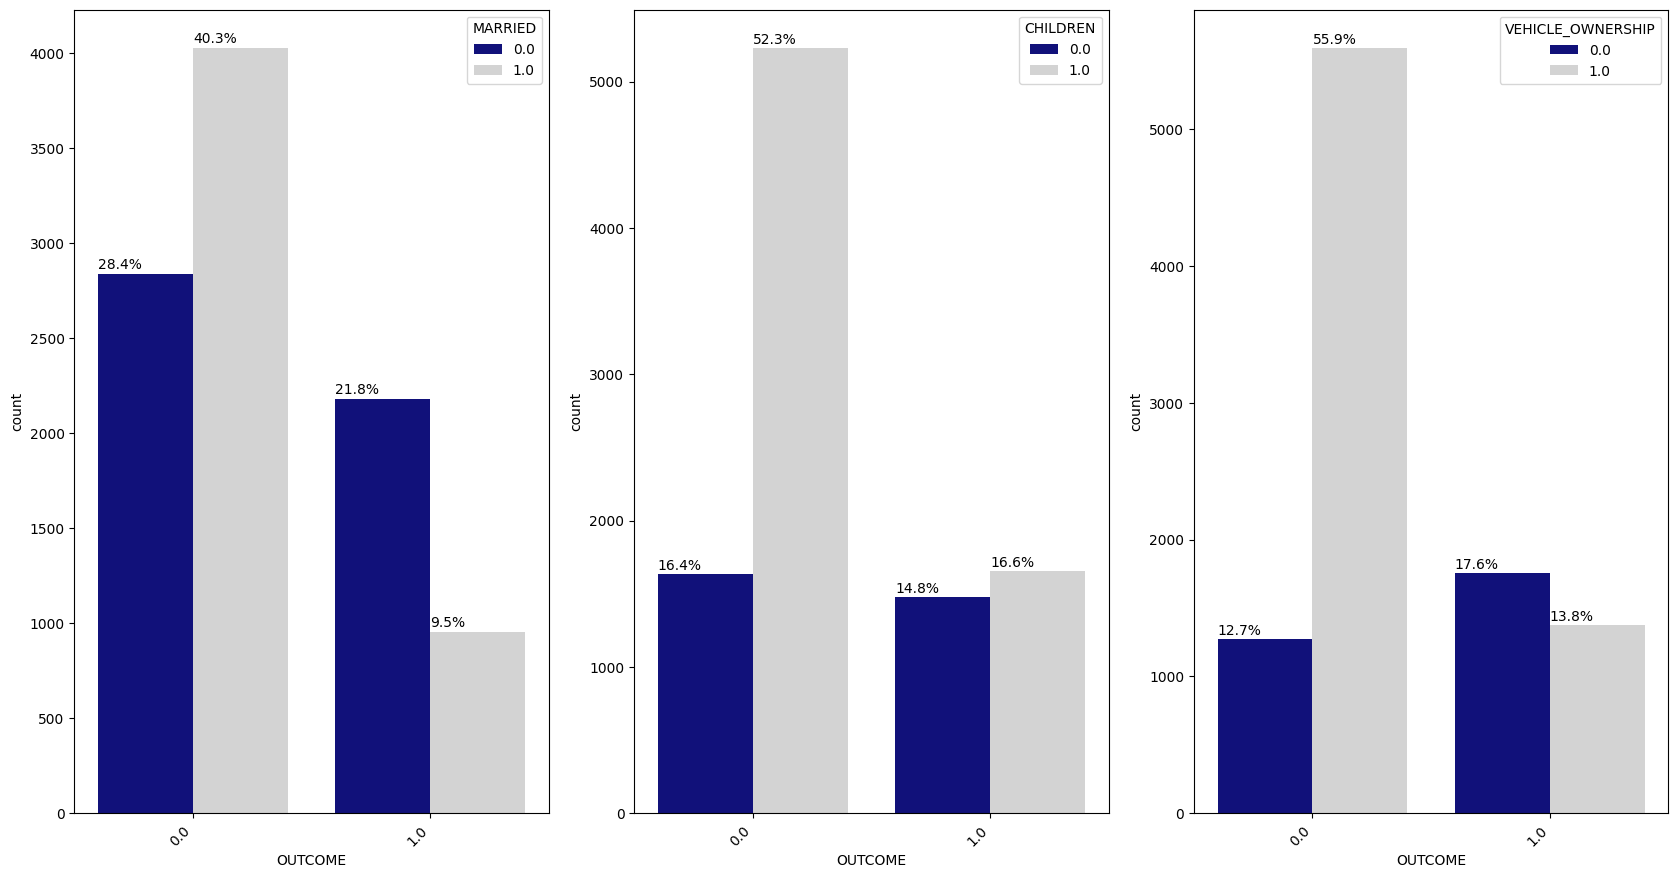

In [ ]:
custom_palette = ['darkblue', 'lightgray', 'darkgreen', 'cyan', 'pink', 'yellow']
plot_features_wrt_target(dataset, binary_numerical, 3, custom_palette=custom_palette)



## Correlation Among Features

By analyzing the correlations among features, with numerical data types, and their association with the outcome variable, we can identify cases where two features are strongly correlated, allowing us to predict one from the other. Consequently, if we discover two highly correlated features, we may opt to eliminate one of them.

In [ ]:
#custom_palette = ['darkblue', 'gray']
#sns.pairplot(dataset, hue='OUTCOME', palette=custom_palette)

### Exploring Pairwise Correlations: Heatmap Analysis with Target Value

OUTCOME                1.000000
ANNUAL_MILEAGE         0.177575
POSTAL_CODE            0.095889
DUIS                  -0.189352
CHILDREN              -0.232835
MARRIED               -0.262104
SPEEDING_VIOLATIONS   -0.291862
CREDIT_SCORE          -0.309010
PAST_ACCIDENTS        -0.311495
VEHICLE_OWNERSHIP     -0.378921
Name: OUTCOME, dtype: float64


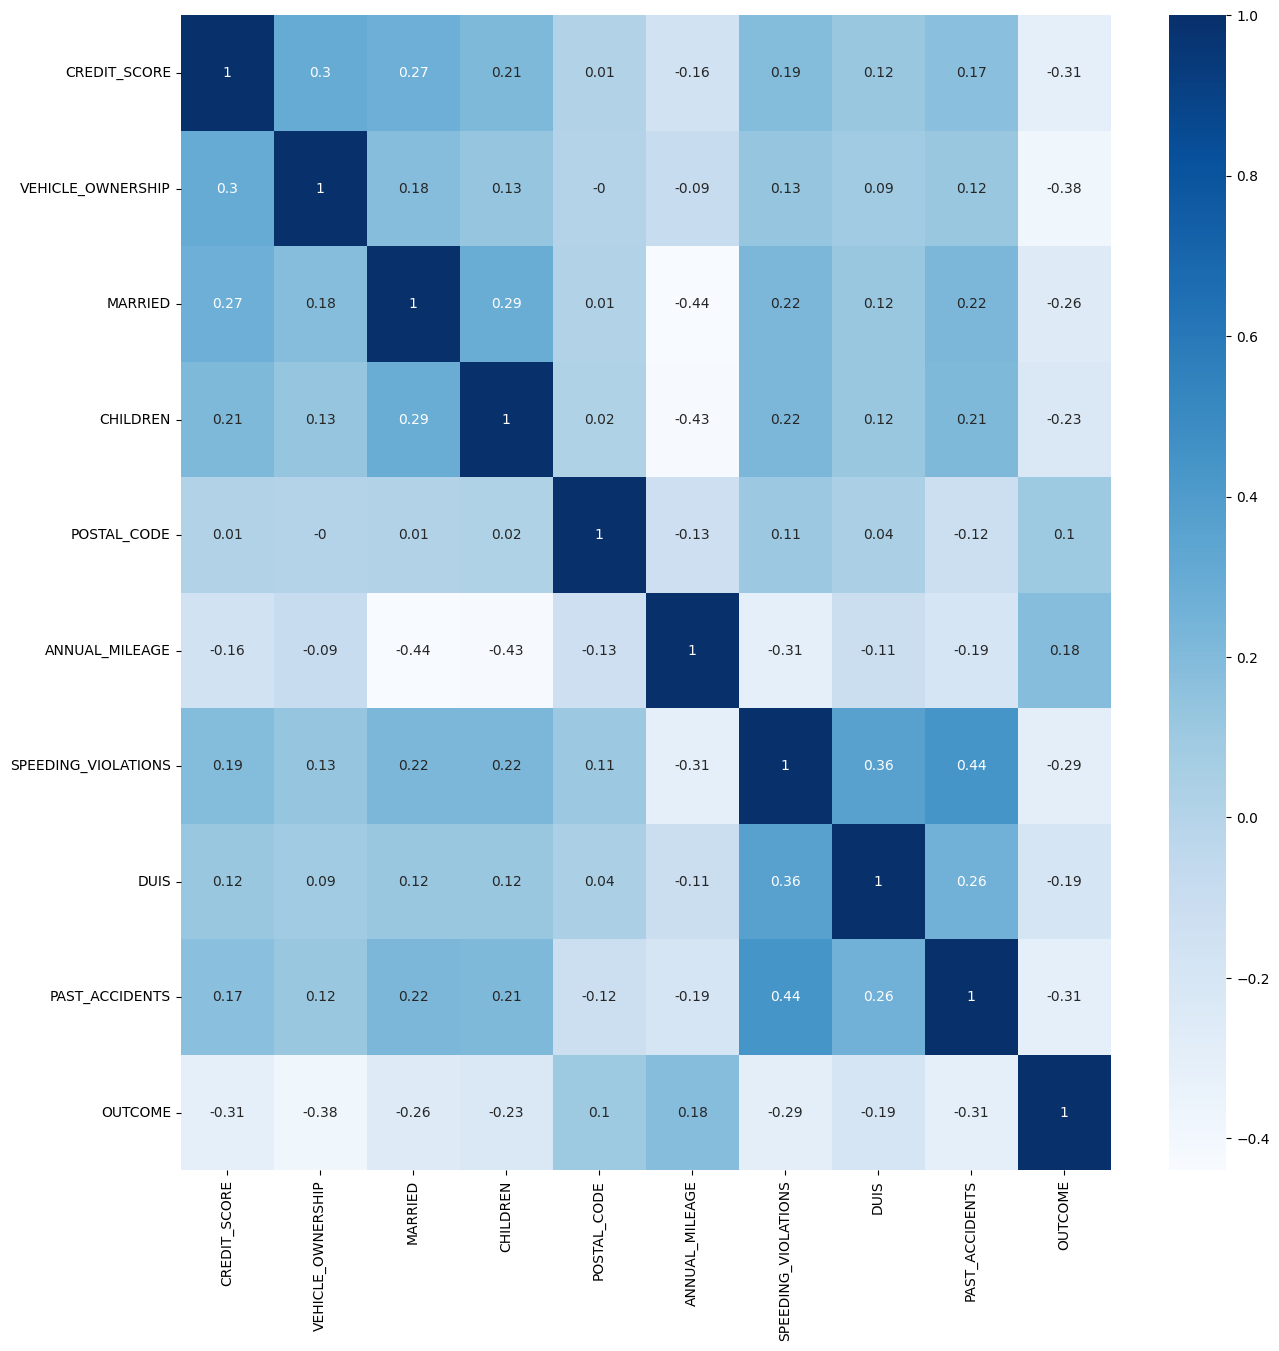

In [15]:
numeric_dataframe = dataset.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(figsize=(15,15))
correlation_matrix = numeric_dataframe.corr().round(2)
cmap = 'Blues'

target_variable = "OUTCOME"
# listing the the correlations between outcome and other variables - from positive to negative
print(numeric_dataframe.corr()[target_variable].sort_values(ascending=False))

# plotting the heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap=cmap);

##### These numerical values can be interpreted as follows:
- Strong correlation: When the correlation coefficient is within the range of ± 0.70 to ± 1.
- Medium correlation: When the correlation coefficient falls within the range of ± 0.30 to ± 0.69.
- Small correlation: When the correlation coefficient is within the range of ± 0.29 and 0.

**Observations:**
- The analysis of the features set indicates a lack of high correlation between any two features.
- Given the absence of a substantial pairwise correlation between the features, it is reasonable to assume that the features are independent.
- The most notable correlation observed is between **'ANNUAL_MILEAGE'** and **'MARRIED'**, with a coefficient of -0.44.
- The feature **'VEHICLE_OWNERSHIP'** exhibits the highest correlation with the **'OUTCOME'** variable among all features.

## Checking and Dealing with The Outliers

- The Function below, when provided with a dataset and a specific column, yields the lower and upper whiskers of the values within that column. Any values falling outside these whiskers are deemed outliers. The whiskers in a box plot represent the extremes within the range defined by the 1st or 3rd quartile plus 1.5 times the Interquartile Range (IQR).

- The upper whisker corresponds to the largest observation that is less than or equal to the 3rd quartile plus 1.5 times the IQR (If there is no data point equal to the upper whisker, then the then the highest point less than upper whisker)

- Conversely, the lower whisker pertains to the smallest observation that is greater than or equal to the 1st quartile minus 1.5 times the IQR (If there is no data point equal to the lower whisker, then the lowest point greater than lower whisker).

In [16]:
def outlier_bound(data, column):

    q1= np.percentile(data[column], 25)
    q3= np.percentile(data[column], 75)
    iqr=q3-q1

    lower_bound = q1 - 1.5*(iqr)
    upper_bound = q3 + 1.5*(iqr)

 # If there is no data point equal to the lower whisker, then the lowest point greater than lower whisker
    lower_whisker = np.min(data[column][data[column] >= lower_bound])
 # If there is no data point equal to the upper whisker, then the highest point lesser than upper whisker
    upper_whisker = np.max(data[column][data[column] <= upper_bound])

    return [round(lower_whisker, 2), round(upper_whisker, 2)]


def outliers_info(data, column):

    lower_whisker, upper_whisker = outlier_bound(data, column)
    print(f"Lower_bound: \'{lower_whisker}\', Upper-bound: \'{upper_whisker}\'")
    print('-'*30)
    outliers = data[(data[column]<lower_whisker) | (data[column]>upper_whisker)][[column, "OUTCOME"]]
    outliers_to_print = data[(data[column]<lower_whisker) | (data[column]>upper_whisker)][[column, "OUTCOME"]].head(3)
    print(f'The number of outliers in \'{column}\' Column is : \'{len(outliers)}\' \n\n')
    return outliers_to_print

##### Outliers in **'ANNUAL_MILEAGE'** column:

<Axes: title={'center': 'Boxplot of ANNUAL_MILEAGE'}>

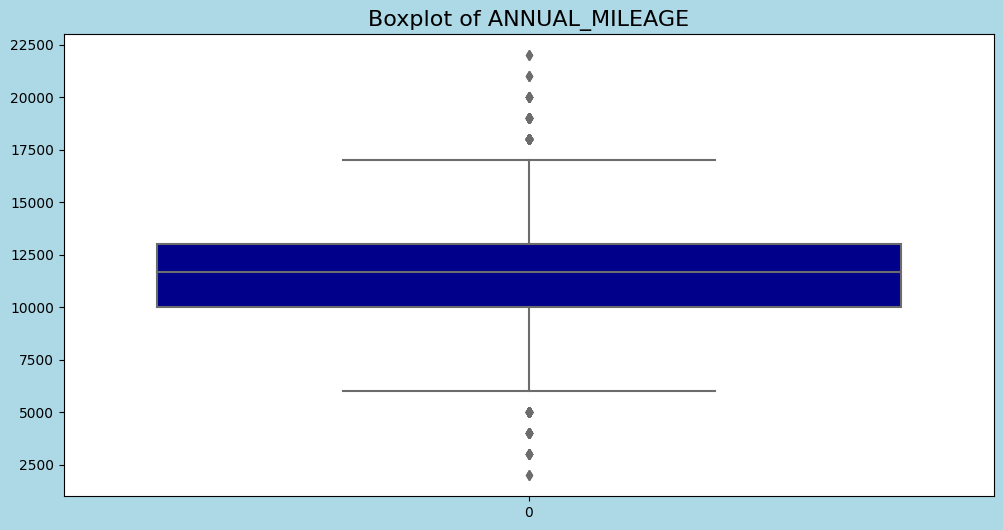

In [ ]:
light_blue = (173/255, 216/255, 230/255)
dark_blue = (0/255, 0/255, 139/255)
plt.figure(figsize=(12,6), facecolor=light_blue)
plt.title('Boxplot of ANNUAL_MILEAGE', fontsize = 16)
sns.boxplot(data=dataset['ANNUAL_MILEAGE'], boxprops=dict(facecolor=dark_blue))

In [ ]:
dataset.ANNUAL_MILEAGE.describe()

count    10000.000000
mean     11697.003207
std       2680.167384
min       2000.000000
25%      10000.000000
50%      11697.003207
75%      13000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

In [ ]:
outliers_info(dataset, 'ANNUAL_MILEAGE')

Lower_bound: '6000.0', Upper-bound: '17000.0'
------------------------------
The number of outliers in 'ANNUAL_MILEAGE' Column is : '273' 




,ANNUAL_MILEAGE,OUTCOME
19,18000.0,1.0
68,5000.0,0.0
287,5000.0,1.0


##### Outliers in **'CREDIT_SCORE'** column:

We will take a look at the outliers in **'CREDIT_SCORE'** column.

<Figure size 2000x2000 with 0 Axes>

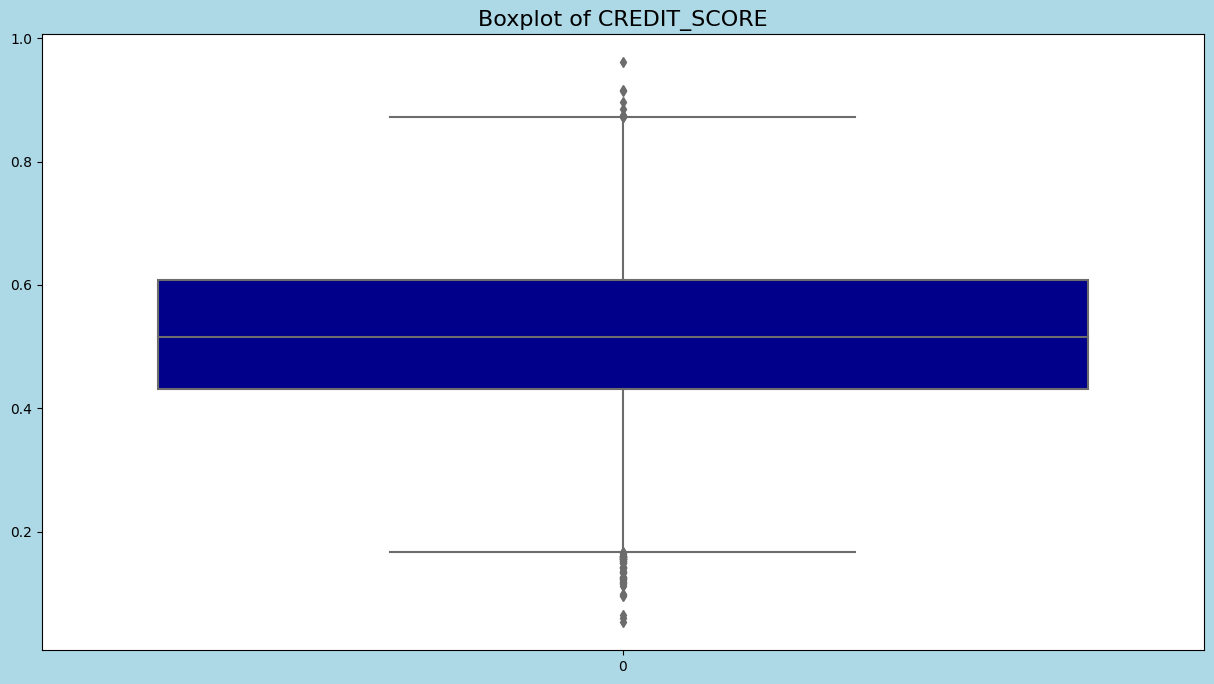

<Figure size 2000x2000 with 0 Axes>

In [ ]:
light_blue = (173/255, 216/255, 230/255)
dark_blue = (0/255, 0/255, 139/255)
plt.figure(figsize=(15,8), facecolor=light_blue)
plt.title('Boxplot of CREDIT_SCORE', fontsize = 16)
sns.boxplot(data=dataset['CREDIT_SCORE'], boxprops=dict(facecolor=dark_blue))

plt.figure(figsize=(20,20), facecolor=light_blue)


In [ ]:
dataset.CREDIT_SCORE.describe()

count    10000.000000
mean         0.515813
std          0.130752
min          0.053358
25%          0.431509
50%          0.515813
75%          0.607607
max          0.960819
Name: CREDIT_SCORE, dtype: float64

In [ ]:
outliers_info(dataset, 'CREDIT_SCORE')

Lower_bound: '0.17', Upper-bound: '0.87'
------------------------------
The number of outliers in 'CREDIT_SCORE' Column is : '64' 




,CREDIT_SCORE,OUTCOME
294,0.126453,1.0
346,0.143657,0.0
382,0.874830,0.0


##### Outliers in **'SPEEDING_VIOLATIONS'** column:

<Axes: title={'center': 'Boxplot of SPEEDING_VIOLATIONS'}>

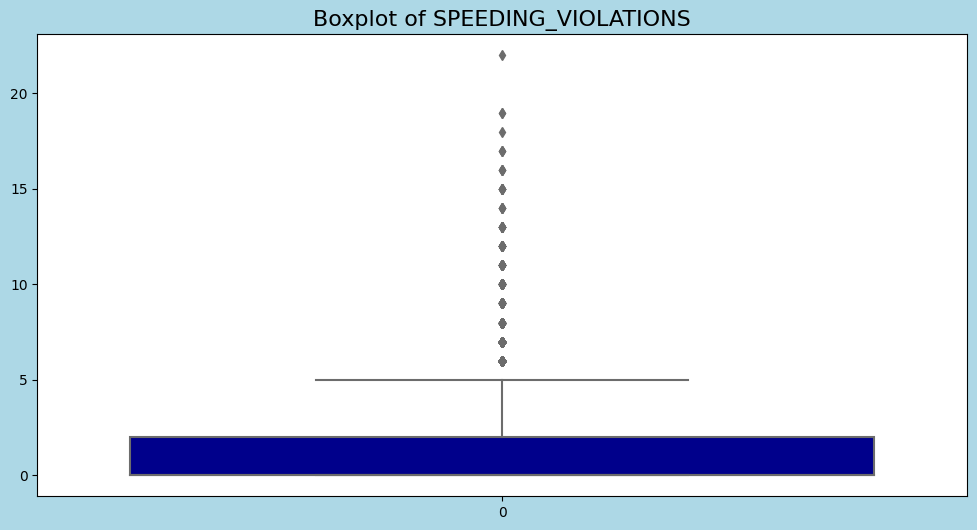

In [ ]:
light_blue = (173/255, 216/255, 230/255)
dark_blue = (0/255, 0/255, 139/255)
plt.figure(figsize=(12,6), facecolor=light_blue)
plt.title('Boxplot of SPEEDING_VIOLATIONS', fontsize = 16)
sns.boxplot(data=dataset['SPEEDING_VIOLATIONS'], boxprops=dict(facecolor=dark_blue))

Here we will show the records that have outliers in this column.


In [ ]:
dataset.SPEEDING_VIOLATIONS.describe()

count    10000.000000
mean         1.482900
std          2.241966
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: SPEEDING_VIOLATIONS, dtype: float64

In [ ]:
outliers_info(dataset, 'SPEEDING_VIOLATIONS')

Lower_bound: '0', Upper-bound: '5'
------------------------------
The number of outliers in 'SPEEDING_VIOLATIONS' Column is : '588' 




,SPEEDING_VIOLATIONS,OUTCOME
6,7,0.0
10,6,0.0
16,10,0.0


##### Outliers in **'PAST_ACCIDENTS'** column:

<Axes: title={'center': 'Boxplot of PATS_ACCIDENTS'}>

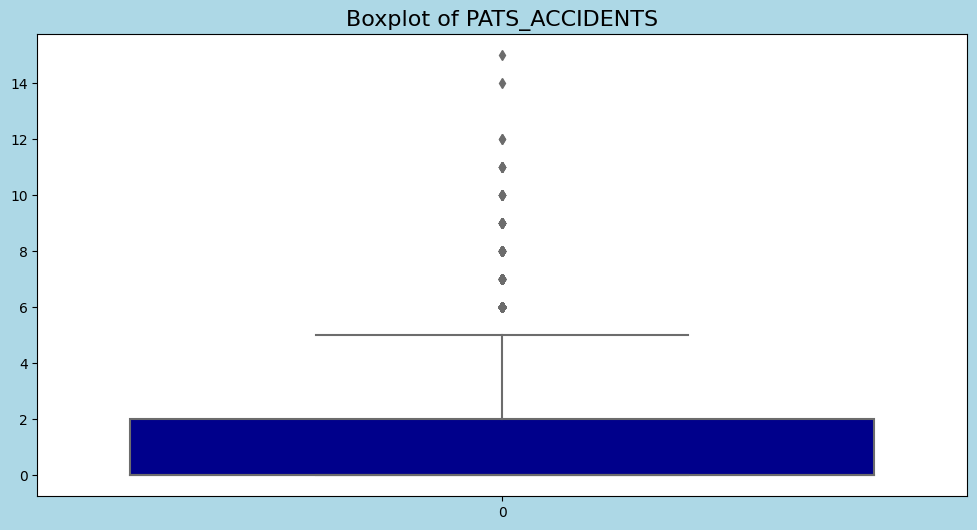

In [ ]:
light_blue = (173/255, 216/255, 230/255)
dark_blue = (0/255, 0/255, 139/255)
plt.figure(figsize=(12,6), facecolor=light_blue)
plt.title('Boxplot of PATS_ACCIDENTS', fontsize = 16)
sns.boxplot(data=dataset['PAST_ACCIDENTS'], boxprops=dict(facecolor=dark_blue))

In [ ]:
dataset.PAST_ACCIDENTS.describe()

count    10000.000000
mean         1.056300
std          1.652454
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         15.000000
Name: PAST_ACCIDENTS, dtype: float64

In [ ]:
outliers_info(dataset, 'PAST_ACCIDENTS')

Lower_bound: '0', Upper-bound: '5'
------------------------------
The number of outliers in 'PAST_ACCIDENTS' Column is : '285' 




,PAST_ACCIDENTS,OUTCOME
10,7,0.0
70,7,1.0
72,7,0.0


### **Observation:**
Upon examining the produced boxplots, the following deductions can be made:
Outliers are present in the columns: 'ANNUAL_MILEAGE', 'PAST_ACCIDENTS', 'SPEEDING_VIOLATIONS', and 'CREDIT_SCORE'.
Two primary methods are commonly employed to address outliers:
1. Removing records that contain outliers.
2. Winsorization, which aims to adjust outliers to the nearest boundary values.

We will deploy Winsorization and cap the outliers to the 99th percentile.

### Winsorization

In [17]:
columns_to_winsorize_at_95 = ['ANNUAL_MILEAGE', 'PAST_ACCIDENTS', 'SPEEDING_VIOLATIONS']
for col in columns_to_winsorize_at_95:
    p95 = dataset[col].quantile(0.95)  # Calculate the 95th percentile for each column
    dataset[col] = dataset[col].clip(upper=p95)  # Replace values above the 95th percentile in each column

p99 = dataset["CREDIT_SCORE"].quantile(0.99)
dataset["CREDIT_SCORE"] = dataset["CREDIT_SCORE"].clip(upper=p99)

In [18]:
print(outliers_info(dataset, 'ANNUAL_MILEAGE'))
print(outliers_info(dataset, 'PAST_ACCIDENTS'))

Lower_bound: '6000.0', Upper-bound: '16000.0'
------------------------------
The number of outliers in 'ANNUAL_MILEAGE' Column is : '104' 


     ANNUAL_MILEAGE  OUTCOME
68           5000.0      0.0
287          5000.0      1.0
300          5000.0      0.0
Lower_bound: '0', Upper-bound: '5'
------------------------------
The number of outliers in 'PAST_ACCIDENTS' Column is : '0' 


Empty DataFrame
Columns: [PAST_ACCIDENTS, OUTCOME]
Index: []


Compared to the previous counts, we have definitely improved a lot!

### Assessing Data Balance
In this phase, we will evaluate the balance within the dataset to determine whether it is evenly distributed or exhibits any significant imbalance.

In [19]:
dataset.OUTCOME.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

<Axes: xlabel='OUTCOME', ylabel='count'>

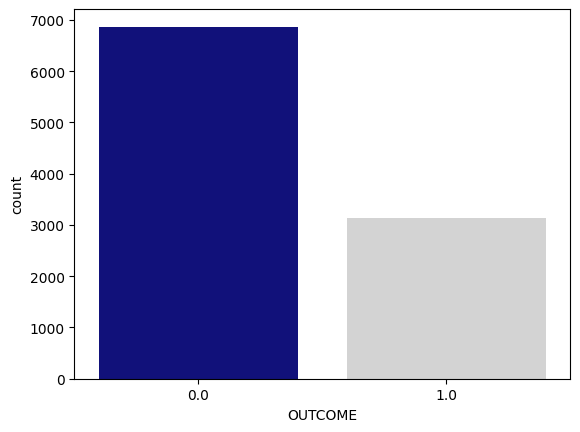

In [20]:
sns.countplot(x='OUTCOME',data=dataset,palette=["darkblue","lightgray"])

This indicates that there's an imbalance between the two classes within the 'OUTCOME' variable. The class labeled as '0.0' has significantly more instances compared to the class labeled as '1.0'.

In scenarios like this, where there's a considerable class imbalance, it can impact the performance and bias the predictions of machine learning models, especially those not designed to handle imbalanced data well.

Some important considerations and recommendations:

- **Evaluation Metrics**: Accuracy might not be an appropriate metric for model evaluation. Metrics like precision, recall, F1-score, ROC-AUC, or PR-AUC are more informative when dealing with imbalanced data.
- **Handling Imbalance**: What to do? Use different algorithms capable of handling imbalance, e.g., ensemble methods like Random Forest, Gradient Boosting.

- **Stratified Split**: When splitting data into training and testing sets, we will use stratified sampling to ensure that both training and testing **sets have a proportional representation of classes**.

More on it later.

In [31]:
# However, we can prepare the weights to be passed to class_weight paramter of our models (used later)
class_frequencies = dataset['OUTCOME'].value_counts(normalize=True)
inverse_class_frequencies = 1 /  class_frequencies
inverse_class_frequencies_dict = inverse_class_frequencies.to_dict()
inverse_class_frequencies_dict

{0.0: 1.45623998835008, 1.0: 3.1918289179699966}

### Feature Selection

A few common techniques for feature selection:

1. **Correlation Analysis**:
Calculate the correlation between each feature and the target variable. Features highly correlated with the target might be important. **Remove features that have very low correlation with the target**

2. **Univariate Selection**:
Use statistical tests, e.g. chi-squared test and ANOVA F-test in case of numerical predictors and categorical output, to select features that have the strongest relationships with the target. SelectKBest in scikit-learn are helpful for this.

3. **Feature Importance**:
For tree-based models (like Random Forest, Gradient Boosting), we can use feature_importances_ attribute to rank features based on their importance.

In [21]:
print(numeric_dataframe.corr()[target_variable].abs().sort_values(ascending=False)) # from previous computations
dataset.drop(columns="POSTAL_CODE", inplace=True)

OUTCOME                1.000000
VEHICLE_OWNERSHIP      0.378921
PAST_ACCIDENTS         0.311495
CREDIT_SCORE           0.309010
SPEEDING_VIOLATIONS    0.291862
MARRIED                0.262104
CHILDREN               0.232835
DUIS                   0.189352
ANNUAL_MILEAGE         0.177575
POSTAL_CODE            0.095889
Name: OUTCOME, dtype: float64


Postal Code can be dropped immediately, following the results of the correlation scores. Let's consider some other techniques for more robust feature selection.

---

We will now use statistical tests, e.g. **Chi-squared test and ANOVA F-test**. These tests are eligible for our purpose because we have both numerical and categorical predictors and the output is categorical (binary).

Why **Chi-squared** test? It evaluates the **independence** between categorical variables. In feature selection, it assesses whether there's a statistically significant relationship between each feature (categorical) and the target variable (categorical). When used in conjunction SelectKBest from sklearn, the Chi-squared test assigns scores to each feature based on their association with the target. **Higher Chi-squared scores indicate stronger evidence of association between a feature and the target variable**.

Why **ANOVA F-test**? The F-test assesses whether there are statistically significant differences in the means of numerical features among different categories or groups within the target variable. **By comparing the variability between and within groups, the F-test quantifies the extent to which a numerical feature explains the variation observed in the target variable across different categories or classes.** Features that contribute significantly to this variation are considered more informative or relevant for predicting the target.

---

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       10000 non-null  float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

To be able to perform such tests, we should have numerical data. However, by peeking at the dataset information, we have some categorical variables too. For the purpose of feature selection, we will convert categorical variables to numeric variables using OrdinalEncoder from sk-learn. However, for our machine learning models, the dataset will be transformed using one hot encoding.

In [ ]:
# Getting the list of categorical variables
categorical = [col for col in dataset.columns if dataset[col].dtypes == "object"]

# Getting the list of numerical variables
numerical = [col for col in dataset.columns if dataset[col].dtypes != "object"]

# Extracting categorical variables from the dataset
categorical_data = dataset[categorical].copy()

# Dropping categorical variables from the original dataset
data = dataset.drop(categorical, axis=1).copy()

# Applying OrdinalEncoder to categorical variables
ordinal_encoder = OrdinalEncoder()
encoded_categorical = pd.DataFrame(ordinal_encoder.fit_transform(categorical_data), columns=categorical)

# Merging numerical and encoded categorical data
numerical_data = pd.concat([data, encoded_categorical], axis=1)

In [ ]:
numerical_data.head(3)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
0,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0


Now, I will separate predictor variables from the dependent variable. Also, I will make a distinction between categorical variables that are label encoded and (originally) numerical variables.

In [ ]:
X, y_binary = (numerical_data.drop(["OUTCOME"], axis=1), numerical_data["OUTCOME"])
X_numerical = X.drop(categorical,axis=1)
numerical.remove("OUTCOME")
X_categorical_label_encoded = X.drop(numerical ,axis=1)

Now it is time to perform the statistical tests. First, I will perform F-test (ANOVA) on the numerical variables.

In [ ]:
# Selecting numerical features based on F-test (ANOVA)
f_selector = SelectKBest(score_func=f_classif, k=5) # selecting the top 5
f_selector.fit(X_numerical, y_binary)
selected_numerical_features = X_numerical.columns[f_selector.get_support()] # boolean mask to retrieve the columns

print(list(selected_numerical_features))
# showing scores
pd.DataFrame({'Feature': X_numerical.columns, 'F_Score': f_selector.scores_}).sort_values(by="F_Score", ascending=False)

['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']


,Feature,F_Score
1,VEHICLE_OWNERSHIP,1676.198581
7,PAST_ACCIDENTS,1227.497122
5,SPEEDING_VIOLATIONS,1171.054722
0,CREDIT_SCORE,1060.539289
2,MARRIED,737.511703
3,CHILDREN,573.082809
6,DUIS,371.801408
4,ANNUAL_MILEAGE,301.501961


Looking at the F-test, we can clearly see ANNUAL_MILEAGE and DUIS column should be excluded from the predictor variables, but we have to keep in mind that F-scores indicate the significance or importance of each feature with respect to the target variable. To be more concrete in Feature Selection, we can later go ahead with the calculation of Feature Importance using tree-based models like Random Forest to make a more informed decision.

---

I will now perform Chi-squared test on the label-encoded categorical features.

In [ ]:
# Selecting label-encoded categorical features based on Chi-squared test

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_categorical_label_encoded, y_binary)

selected_categorical_features = X_categorical_label_encoded.columns[chi2_selector.get_support()]

print(list(selected_categorical_features))
pd.DataFrame({'Feature': X_categorical_label_encoded.columns, 'Score': chi2_selector.scores_}).sort_values(by="Score", ascending=False)

['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']


,Feature,Score
3,DRIVING_EXPERIENCE,2269.811726
0,AGE,1419.228375
6,VEHICLE_YEAR,262.477884
4,EDUCATION,70.970881
1,GENDER,57.582372
5,INCOME,14.712906
2,RACE,0.617809
7,VEHICLE_TYPE,0.300790


Looking at the Chi^2-test, we can clearly see VEHICLE_TYPE and RACE columns should be excluded from the predictor variables. Again, to be more concrete on our decision, I will proceed with computation of feature importance using Random Forest.

In [ ]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit RandomForestClassifier to the data
rf_classifier.fit(X, y_binary)

# Retrieve feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Optional: Select top K features based on importance
k = 10
print(feature_importance_df['Feature'].head(k).tolist())

['CREDIT_SCORE', 'DRIVING_EXPERIENCE', 'ANNUAL_MILEAGE', 'VEHICLE_OWNERSHIP', 'AGE', 'VEHICLE_YEAR', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'INCOME', 'EDUCATION']


In [ ]:
feature_importance_df

,Feature,Importance
0,CREDIT_SCORE,0.204375
11,DRIVING_EXPERIENCE,0.151260
4,ANNUAL_MILEAGE,0.104711
1,VEHICLE_OWNERSHIP,0.086166
8,AGE,0.082298
14,VEHICLE_YEAR,0.063102
5,SPEEDING_VIOLATIONS,0.062362
7,PAST_ACCIDENTS,0.051803
13,INCOME,0.041892
12,EDUCATION,0.036097


Taking into account the outcomes from both statistical tests—Chi-squared and F-score—as well as the feature importance scores derived from the Random Forest analysis, it is advisable to eliminate the columns VEHICLE_TYPE and RACE from our dataset. While there might be a temptation to remove additional features such as DUIS, it's crucial to exercise caution, considering that excessive feature reduction could lead to an underfitted model, potentially resulting in diminished model performance.

In [23]:
dataset.drop(columns=["VEHICLE_TYPE", "RACE"], inplace=True)

In [24]:
print(list(dataset.columns))

['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


### Moving to the Modelling Part

First, lets make all the data into numeric form. We will use one hot encoding and ordinal encoding for the categorical data.

#### First: Ordered Categorical Features

AGE

In [ ]:
# Get unique values in the 'AGE' column
unique_values = dataset['AGE'].unique()
print("All possible values in 'AGE' column:", unique_values)

All possible values in 'AGE' column: ['65+' '16-25' '26-39' '40-64']


DRIVING_EXPERIENCE

In [ ]:
# Get unique values in the 'DRIVING_EXPERIENCE' column
unique_values = dataset['DRIVING_EXPERIENCE'].unique()
print("All possible values in 'DRIVING_EXPERIENCE' column:", unique_values)

All possible values in 'DRIVING_EXPERIENCE' column: ['0-9y' '10-19y' '20-29y' '30y+']


EDUCATION

In [ ]:
# Get unique values in the 'EDUCATION' column
unique_values = dataset['EDUCATION'].unique()
print("All possible values in 'EDUCATION' column:", unique_values)

All possible values in 'EDUCATION' column: ['high school' 'none' 'university']


INCOME

In [ ]:
# Get unique values in the 'INCOME' column
unique_values = dataset['INCOME'].unique()
print("All possible values in 'INCOME' column:", unique_values)

All possible values in 'INCOME' column: ['upper class' 'poverty' 'working class' 'middle class']


VEHICLE_YEAR

In [ ]:
# Get unique values in the 'VEHICLE_YEAR' column
unique_values = dataset['VEHICLE_YEAR'].unique()
print("All possible values in 'VEHICLE_YEAR' column:", unique_values)

All possible values in 'VEHICLE_YEAR' column: ['after 2015' 'before 2015']


#### Then the nominal ones

GENDER

In [ ]:
# Get unique values in the 'GENDER' column
unique_values = dataset['GENDER'].unique()
print("All possible values in 'GENDER' column:", unique_values)

All possible values in 'GENDER' column: ['female' 'male']


Now we transform the categorical features above into numerical ones using OrdinalEncoder for ordinal array-like featurse and OneHotEncoder for the others.

In [25]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

# Specify the ordinal features
ordinal_features = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']

# Specify the order for each feature
categories = [['16-25', '26-39', '40-64', '65+'],
              ['0-9y', '10-19y', '20-29y', '30y+'],
              ['none', 'high school', 'university'],
              ['poverty', 'working class', 'middle class', 'upper class'],
              ['before 2015', 'after 2015']]

# Encode ordinal features
oe = OrdinalEncoder(categories=categories)
transformed_ordinal_data = oe.fit_transform(dataset[ordinal_features])

# Specify the nominal features
nominal_features = ['GENDER']

# One-hot encode nominal features
ohe = OneHotEncoder(sparse=False)
transformed_nominal_data = ohe.fit_transform(dataset[nominal_features])

# Get the feature names from OneHotEncoder
nominal_encoded_columns = ohe.get_feature_names_out(input_features=nominal_features)

# Convert the transformed data into DataFrames
transformed_ordinal_df = pd.DataFrame(transformed_ordinal_data, columns=[f'{feat}_encoded' for feat in ordinal_features])
transformed_nominal_df = pd.DataFrame(transformed_nominal_data, columns=nominal_encoded_columns)

# Resetting indices for all DataFrames
dataset.reset_index(drop=True, inplace=True)
transformed_ordinal_df.reset_index(drop=True, inplace=True)
transformed_nominal_df.reset_index(drop=True, inplace=True)

# Concatenate the original dataset with the transformed features
dataset_encoded = pd.concat([dataset, transformed_ordinal_df, transformed_nominal_df], axis=1)

# Concatenate the original dataset with the transformed features
dataset_encoded = pd.concat([dataset, transformed_ordinal_df, transformed_nominal_df], axis=1)

And we replace the categorical counterpart with the new encoded ones.

In [26]:
catcolumn = ['GENDER', 'AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']
dataset_encoded = dataset_encoded.drop(catcolumn,axis=1)
dataset_encoded["OUTCOME"] = dataset.OUTCOME

In [27]:
dataset_encoded.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_encoded,DRIVING_EXPERIENCE_encoded,EDUCATION_encoded,INCOME_encoded,VEHICLE_YEAR_encoded,GENDER_female,GENDER_male
0,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0,3.0,0.0,1.0,3.0,1.0,1.0,0.0
1,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
4,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Now, lets scale the non binary columns to the a 0 - 1 range for better model performance and convergence.

In [28]:
def get_nonbinary_columns(df):
    non_binary_columns = []
    for col in df.columns:
        if df[col].nunique() > 2 and pd.api.types.is_numeric_dtype(df[col].dtype):
            # Check if the column has only two unique values and is of a numeric type
            non_binary_columns.append(col)
    return non_binary_columns

non_binary_columns = get_nonbinary_columns(dataset_encoded)

scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
dataset_encoded[non_binary_columns] = scaler.fit_transform(dataset_encoded[non_binary_columns])

Now comes the part to split the data for training and testing using sklearn.model_selection.train_test_split.

In [29]:
X, y = (dataset_encoded.drop(["OUTCOME"], axis=1), dataset_encoded["OUTCOME"])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#'test_size' parameter determines the proportion of the dataset allocated for testing
# stratified sampling ensures that the class distribution is preserved in both the training and testing sets

# **From Here**
## We have the train_set and the test_set, already normalized: X_train, X_test.



Now, as the data has already been splitted for the training and testing part, lets deploy some models on the training part.

---

We will start using Logistic Regression classifier, which is the most common one.

We will use Logistic Regression for these reasons:

- Since the target variable (OUTCOME) consists of two classes (0-1), logistic regression is specifically designed for such binary outcomes.

- It's a simple model, computationally efficient and doesn’t require many hyperparameters to tune, making it simpler to implement and understand.

**Limitations**:

- Logistic regression assumes linear relationships between the features and the log-odds of the target variable, so if the true relationship is highly nonlinear, logistic regression might not perform well.

---


In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42 ,class_weight = inverse_class_frequencies_dict)

**Hyperparameters and their Roles**:


1. Inverse of regularization strength (C):
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

2. Penalty:
Specify the norm of the penalty.

3. Solver: Algorithm to use in the optimization problem.

By tuning these hyperparameters effectively, we can enhance the model's performance, avoid overfitting, and build a more accurate predictive model. To tune the hyperparameters, we will use RandomizedSearchCV and k-fold cross validation from sklearn. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Randomized Search is typically faster and more efficient for large search spaces since it considers only a sample of the combinations of the hyperparameters in question.

---

In [49]:
# Define the hyperparameter space
param_dist = {
    'C': np.arange(0.1,1.1,0.1),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty ('l1' or 'l2')
    'solver': ['lbfgs','liblinear', 'saga']  # Solver ('lbfgs' by default, 'liblinear' for 'l1', 'saga' for 'l2')
}


# RandomizedSearchCV to find the best hyperparameters; scoring metric set to ROC AUC, 100 iterations 4 times (CV).
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist, n_iter=100, cv=4,
                                   scoring="recall", verbose=1, random_state=42)

# Fit the model with class weights
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print("Best Recall score out of the given parameters: ", best_score)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
{'solver': 'saga', 'penalty': 'l1', 'C': 0.7000000000000001}
Best Recall score out of the given parameters:  0.8495510850900123


Having the hyperparamters tuned, lets fit instantiate the Logreg with these parameters and fit the model on the training data. Then, we will predict on the test set and make a classification report.

In [44]:
log_reg_best_model = random_search.best_estimator_

# Retrain the best model on the whole training set
log_reg_best_model.fit(X_train, y_train)
y_pred = log_reg_best_model.predict(X_test) # predict the outcome variable
report = classification_report(y_test, y_pred) # make a classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      1373
         1.0       0.64      0.84      0.72       627

    accuracy                           0.80      2000
   macro avg       0.78      0.81      0.78      2000
weighted avg       0.83      0.80      0.81      2000



A brief interpretation of the classification report:

- **Precision**: Precision measures the accuracy of the positive predictions made by the model. For class 0, out of all instances predicted as class 0, 90% are actually class 0. For class 1, out of all instances predicted as class 1, 75% are actually class 1.

- **Recall**: Recall measures the proportion of actual positives that were correctly identified by the model. For class 0, the model correctly identified 88% of all actual class 0 instances. For class 1, it correctly identified 73% of all actual class 1 instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It gives an overall measure of a class's accuracy. Higher values indicate better performance.

- **Accuracy**: Overall, the model's accuracy on this test set is 83%. This measures the proportion of correctly classified instances out of the total instances.

Overall, the model seems to perform reasonably well with higher precision for class 0 and higher recall for class 1. In situation when missing actual positive cases is costly, such as not being able to predict positive if there is an possibility of an actual positive for insurance claim is costly, the **recall** metric is of absolute importance and our model performs well.

---

We will now compute the ROC AUC Score for our model.

In [45]:
# Predict probabilities on the test set
y_pred_proba = log_reg_best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8856396602975358


ROC AUC Score metric assesses the model's ability to distinguish between classes. A score close to 0.9 and above exhibits excellent predictive power. There is a 88.6% chance that our model will assign a higher predicted probability to a randomly chosen positive instance than to a randomly chosen negative one.

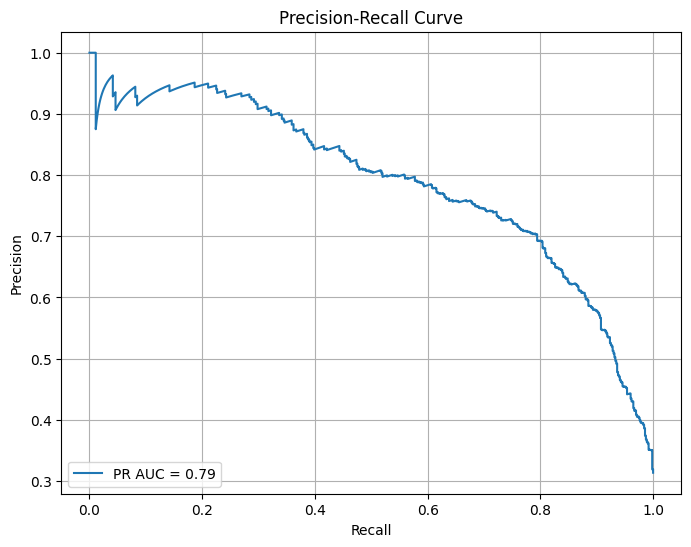

In [36]:
# Assuming y_pred_proba contains predicted probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# last plot is awaiting interpretation.

Now, as the data has already been splitted for the training and testing part, lets deploy some models on the training part.

---

We will use XGBoost (Extreme Gradient Boosting), which is a popular machine learning algorithm. Why XGBoost for Logistic Regression?

- XGBoost builds a powerful predictive model by combining the predictions of multiple individual models (called base learners), hence classified as ensemble learning model. It operates sequentially, with each new model correcting the errors made by the previous ones.

- XGBoost primarily uses decision trees as its base learners. Decision Trees, in the context of Machine Learning, are models that predicts the value of a target variable based on several input features by learning simple decision rules inferred from the data features.

- Decision trees consist of nodes that represent features, branches that represent decisions or rules, and leaf nodes that represent the outcome or prediction. At each node, the tree algorithm selects the best feature to split the data based on certain criteria (e.g., Gini impurity)

- XGBoost fits each new tree to the residuals (the differences between predicted and actual values) of the previous trees. At each step, the algorithm tries to minimize the loss function by adding a new tree that reduces the residuals. The algorith is also scalabe and efficient even to large datasets.

- Real-world data often contains complex non-linear relationships. **XGBoost with decision trees can capture these non-linear patterns** better than traditional logistic regression.

---

**Hyperparameters and their Roles**:

1. Learning Rate (eta):
Controls the step size at each iteration while moving toward a minimum of the loss function. Lower values make the model more robust but require more boosting rounds.

2. Maximum Depth (max_depth):
Limits the maximum depth of the individual trees in the ensemble. Higher depths allow the model to capture more complex relationships but increase the risk of overfitting.

3. Number of Trees (n_estimators):
Specifies the number of boosting rounds or trees to be built. A higher number of trees can lead to overfitting, while too few trees might result in underfitting.

4. Regularization Parameters (lambda, alpha):
Lambda (L2 regularization term) and alpha (L1 regularization term) help control overfitting by adding penalty terms to the objective function.

5. Minimum Child Weight (min_child_weight):
Specifies the minimum sum of instance weight needed in a child. Higher values prevent the model from learning too specific patterns.

6. Gamma and Column Subsampling (colsample_bytree):
Gamma corresponds to the minimum loss reduction allowed for a split to occur. Higher values means model is more conservative regarding making splits in the tree. `colsample_bytree` controls the fraction of features (columns) to be randomly sampled for building each tree during training. A value of 1 means all columns are used.

By tuning these hyperparameters effectively, we can enhance the model's performance, avoid overfitting, and build a more accurate predictive model using XGBoost. To tune the hyperparameters, we will use RandomizedSearchCV and k-fold cross validation from sklearn. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Randomized Search is typically faster and more efficient for large search spaces since it considers only a sample of the combinations of the hyperparameters in question.

---

In [47]:
# Define the XGBClassifier with proper scale_pos_weight to handle the imbalance in data
xgb = XGBClassifier(random_state=42, scale_pos_weight = inverse_class_frequencies_dict[1]) # instantiation of the model

# Define the hyperparameters to be tuned.
param_dist = {
    'learning_rate': np.arange(0.05, 1.05, 0.05), # Controls the step size at each iteration
    'max_depth': np.arange(3, 11, 1), # The maximum depth of the individual trees in the ensemble
    'n_estimators': np.arange(50, 301, 50), # the number of boosting rounds or trees to be built
    'reg_lambda': [0.1, 1, 10], # L2 regularization
    'min_child_weight': [1, 3, 5, 8, 10], # the minimum sum of instance weight needed in a child
    'colsample_bytree' : [0.1, 0.5, 0.8, 1], # fraction of features (columns) to be randomly sampled
    'gamma': [0, 0.1, 1, 10] # the minimum loss reduction allowed for a split to occur.
}

# RandomizedSearchCV to find the best hyperparameters; scoring metric set to ROC AUC, 100 iterations 4 times (CV).
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=4,
                                   scoring="recall", verbose=1, random_state=42)

# Fit the model with class weights
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print("Best Recall score out of the given parameters: ", best_score)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
{'reg_lambda': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.4, 'gamma': 10, 'colsample_bytree': 0.1}
Best Recall score out of the given parameters:  0.8810719435824531


Having the hyperparamters tuned, lets fit instantiate the XGBoost with these parameters and fit the model on the training data. Then, we will predict on the test set and make a classification report.

In [38]:
best_model = random_search.best_estimator_

# Retrain the best model on the whole training set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) # predict the outcome variable
report = classification_report(y_test, y_pred) # make a classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      1373
         1.0       0.60      0.87      0.71       627

    accuracy                           0.77      2000
   macro avg       0.76      0.80      0.76      2000
weighted avg       0.82      0.77      0.78      2000



A brief interpretation of the classification report:

- **Precision**: Precision measures the accuracy of the positive predictions made by the model. For class 0, out of all instances predicted as class 0, 92% are actually class 0. For class 1, out of all instances predicted as class 1, 60% are actually class 1.

- **Recall**: Recall measures the proportion of actual positives that were correctly identified by the model. For class 0, the model correctly identified 73% of all actual class 0 instances. For class 1, it correctly identified 87% of all actual class 1 instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It gives an overall measure of a class's accuracy. Higher values indicate better performance. For class 0, we have a F1-score of 82%. For class 1, we have a F1-score of 71%

- **Accuracy**: Overall, the model's accuracy on this test set is 77%. This measures the proportion of correctly classified instances out of the total instances.

Overall, the model seems to perform reasonably well with higher precision for class 0 and higher recall for class 1. In situation when missing actual positive cases is costly, such as not being able to predict positive if there is an possibility of an actual positive for insurance claim is costly, the **recall** metric is of absolute importance and our model performs well.

---

We will now compute the ROC AUC Score for our model.

In [39]:
# Predict probabilities on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1] # for class 1

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc) # ROC AUC Score: 0.8845378692045613

ROC AUC Score: 0.8805988353655774


ROC AUC Score metric assesses the model's ability to distinguish between classes. A score close to 0.9 and above exhibits excellent predictive power. There is a 88% chance that our model will assign a higher predicted probability to a randomly chosen positive instance than to a randomly chosen negative one.

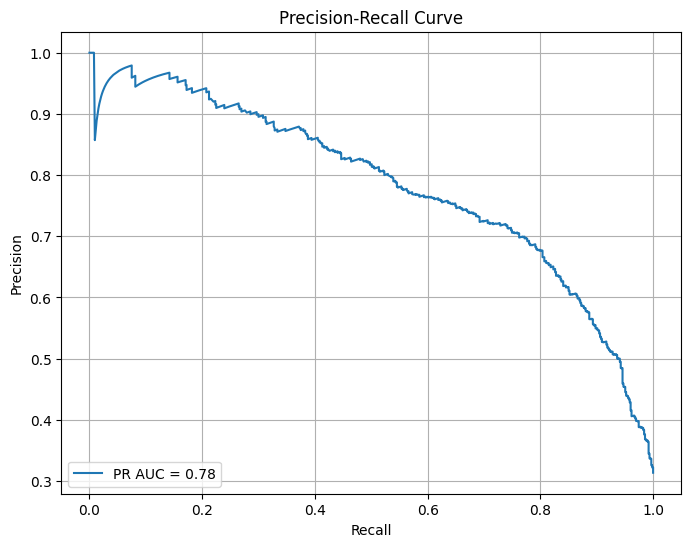

In [40]:
# y_pred_proba contains predicted probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# last plot is awaiting interpretation.

Lets move to the third machine learning model for predicting insurance claim. We will now use SVM model.

### **Support Vector Machine**


SVM is a supervised learning algorithm used for both classification and regression tasks.It works by finding the hyperplane that best separates the data into different classes. The hyperplane is chosen to maximize the margin between the classes.

**Support Vector Classification (SVC):**

SVC is the classification implementation of SVM in scikit-learn.SVC is specifically designed for classification tasks, and it is a type of SVM tailored for handling labeled datasets.
SVC aims to find the hyperplane that best separates the data into different classes while minimizing classification errors.

**SVM Hyperparameters for Classification:**

1. **C** (Regularization Parameter):

The C parameter controls the trade-off between having a smooth decision boundary and classifying the training points correctly. A smaller C encourages a larger-margin hyperplane but allows more training points to be misclassified.

2. **Kernel:**

The kernel parameter specifies the type of kernel used for transforming the input features into a higher-dimensional space. Common choices include 'linear', 'poly' (polynomial), 'rbf' (radial basis function), and 'sigmoid'.
Degree (for Polynomial Kernel):

If the selected kernel is 'poly', the degree parameter controls the degree of the polynomial.

3. **Gamma:** (for RBF Kernel):

If the selected kernel is 'rbf', the gamma parameter controls the shape of the decision boundary. A low value of gamma results in a wider decision boundary, while a high value of gamma results in a more complex decision boundary.


After we have completed hyperparameter tuning, we can now implement this SVM model to our data.

First we will train it on X_train and Y_train, then make predictions on test data. In the end we will evaluate our prediction by comparing it with the true labels (y_test).

In [ ]:
# Create the pipeline : SVM without tuning the hyperparameters
svm2 = SVC(random_state=42, probability=True)  # Set probability=True for predict_proba support
scaler = StandardScaler()
pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', svm2)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.8607137422447732


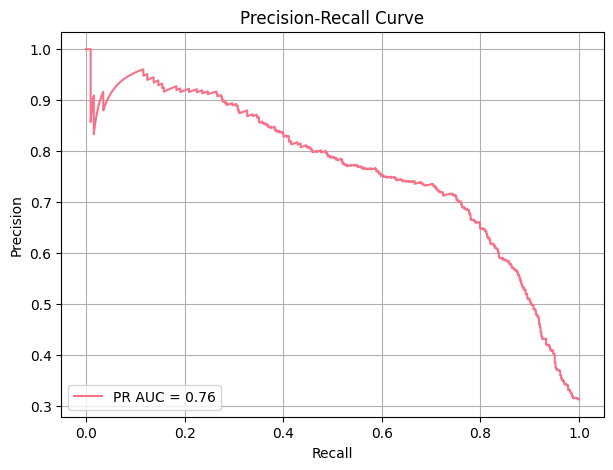

In [ ]:
# y_pred_proba contains predicted probabilities for the positive class (1)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
# Define the SVC with proper class_weight to handle the imbalance in data
svm = SVC(random_state=42, class_weight = inverse_class_frequencies_dict)

# kindly use this class weights = inverse_class_frequencies_dict

# Define the StandardScaler
scaler = StandardScaler()   ##kindly check

# Create a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', svm)
])

# Define the hyperparameters to be tuned
param_dist = {
    'svm__C': np.arange(0.1, 1.1, 0.3),           # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],     # Kernel type
    'svm__degree': np.arange(1, 4),                # Degree of the polynomial kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient for 'rbf' and 'poly'
}

# RandomizedSearchCV to find the best hyperparameters; scoring metric set to recall, 100 iterations 4 times (CV).
random_search_svm = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=30, cv=3,
                                       scoring="recall", verbose=1, random_state=42)

# Fit the model with class weights and feature scaling
random_search_svm.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svm = random_search_svm.best_params_
best_score_svm = random_search_svm.best_score_

print(best_params_svm)
print("Best Recall score out of the given parameters: ", best_score_svm)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'svm__kernel': 'poly', 'svm__gamma': 'auto', 'svm__degree': 3, 'svm__C': 0.7000000000000001}
Best Recall score out of the given parameters:  0.8363956297930454


In [ ]:
SVM_best_model = random_search.best_estimator_

# train the best model on the whole training set
SVM_best_model.fit(X_train, y_train)
y_pred = SVM_best_model.predict(X_test) # predict the outcome variable
report = classification_report(y_test, y_pred) # Compare our prediction to actual labels
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      1373
         1.0       0.60      0.87      0.71       627

    accuracy                           0.77      2000
   macro avg       0.76      0.80      0.76      2000
weighted avg       0.82      0.77      0.78      2000



**Precision:**

Precision for class 0 (label 0.0): 0.90
Out of all instances predicted as class 0, 90% were actually class 0.
Precision for class 1 (label 1.0): 0.69
Out of all instances predicted as class 1, 69% were actually class 1.

**Recall (Sensitivity):**

Recall for class 0 (label 0.0): 0.84
Out of all actual instances of class 0, 84% were correctly predicted.
Recall for class 1 (label 1.0): 0.79
Out of all actual instances of class 1, 79% were correctly predicted.

**F1-Score:**

F1-score for class 0 (label 0.0): 0.87
F1-score for class 1 (label 1.0): 0.73

**Support:**

The number of actual occurrences of the class in the specified dataset.

**Accuracy:**


Overall accuracy: 82%
82% of all instances were correctly classified.

**Macro Average and Weighted Average:**

Macro average calculates the average performance across all classes, giving equal weight to each class.
Weighted average calculates the average performance, but with weights proportional to the number of true instances for each class.

**Interpretating the results in this report:**

The model performs well for class 0 (label 0.0), with high precision (90%) and recall (84%).
The model's performance for class 1 (label 1.0) is acceptable but lower, with lower precision (69%) and recall (79%).
The weighted average F1-score is 0.82, indicating a reasonably balanced performance across classes.
The overall accuracy is 82%, which is the percentage of correctly classified instances.
In summary, the model has a good overall performance, especially for predicting class 0, while there is room for improvement in predicting class 1.

**ROC AUC For our SVM Model**

In [ ]:
# Predict probabilities on the test set
y_pred_proba = SVM_best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8805988353655774


Similar to XGB Classifier we have a ROC AUC score of 0.8801, which indicates that the model has a high discriminatory power in distinguishing between the two classes, and it performs well in terms of ranking positive instances higher than negative instances

**Now we are plotting Precision-Recall Curve for SVM Model**

Each point on the curve corresponds to a different threshold for classifying instances as positive or negative.
The curve illustrates the trade-off between precision and recall at different classification thresholds.
The AUC for the Precision-Recall curve (PR AUC) is a single metric summarizing the overall performance of the model across different levels of precision and recall.
A higher AUC indicates better model performance, with a perfect model having an AUC of 1.

An AUC of 0.78 suggests that the model has a reasonably good balance between precision and recall.
The model is effective in identifying positive instances (high recall) while maintaining a relatively high precision.

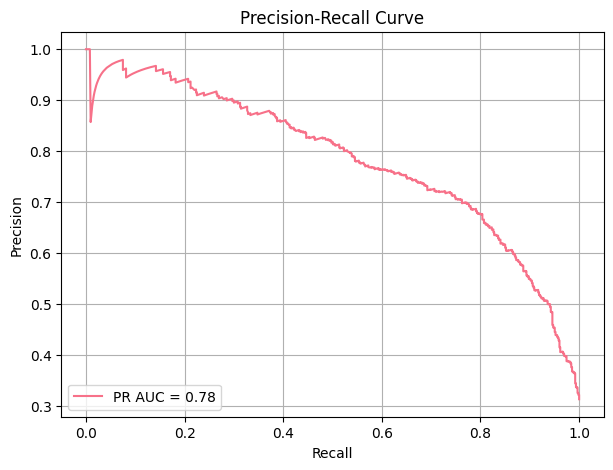

In [ ]:
# y_pred_proba contains predicted probabilities for the positive class (1)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# **Fatemeh**:

We will see the last model of classic machine learning below.

**k-Nearest Neighbors**

The k-Nearest Neighbors (KNN) algorithm is a simple and intuitive machine learning algorithm used for classification and regression tasks. In KNN, an object is classified by a majority vote of its k nearest neighbors.

---
**KNN Hyperparameters**

**n_neighbors:** Number of neighbors to use by default for kneighbors queries.

**weights:** Weight function used in prediction.

*   uniform : uniform weights. All points in each neighborhood are weighted equally.
*   distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.


**p:**
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance, and euclidean_distance for p = 2.

---

Tuning hyperparameters is a crucial step to optimize the performance of a machine learning model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_dist = {
    'n_neighbors': list(range(1, 20)),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],   # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# RandomizedSearchCV to find the best hyperparameters; scoring metric set to ROC AUC, 100 iterations 4 times (CV).
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, cv=4,
                                   scoring="recall", verbose=1, random_state=42)

# Fit the model with class weights
random_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print("Best Recall score out of the given parameters: ", best_score)


Fitting 4 folds for each of 76 candidates, totalling 304 fits
{'reg_lambda': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.4, 'gamma': 10, 'colsample_bytree': 0.1}
Best Recall score out of the given parameters:  0.8810719435824531


In [ ]:
knn_best_model = random_search_knn.best_estimator_

# Retrain the best model on the whole training set
knn_best_model.fit(X_train, y_train)

y_pred = knn_best_model.predict(X_test) # predict the outcome variable
report = classification_report(y_test, y_pred) # make a classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1373
         1.0       0.71      0.72      0.72       627

    accuracy                           0.82      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.82      0.82      0.82      2000



In [ ]:
y_pred_proba = knn_best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8721538999455203


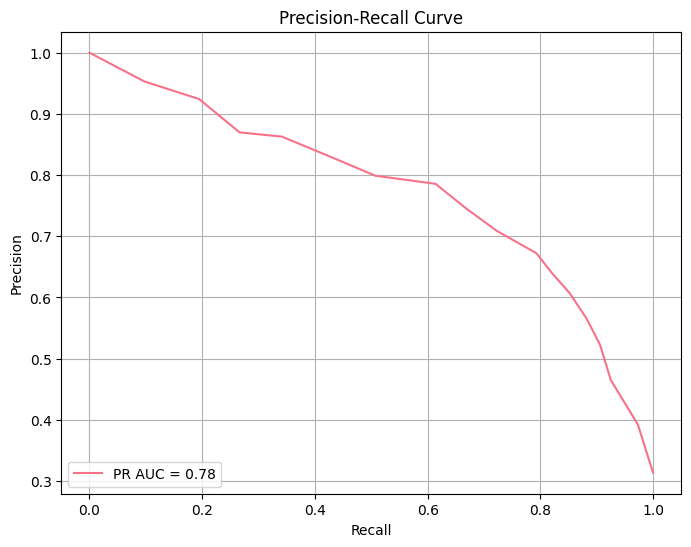

In [ ]:
# y_pred_proba contains predicted probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Neural Network Model

A neural network is a computational model inspired by the way biological neural networks in the human brain work. It is composed of interconnected nodes, or artificial neurons, organized into layers. Each connection between nodes has an associated weight that the network learns to adjust during training.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=5)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1600/1600 [

## **fatemeh End **

In [ ]:
y_pred = model.predict(X_test) # predict the outcome variable


63/63 [==============================] - 0s 1ms/step


In [ ]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC Score:", roc_auc)

63/63 [==============================] - 0s 1ms/step
ROC AUC Score: 0.8839861024474049


In [ ]:

from sklearn.metrics import recall_score

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute recall
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

63/63 [==============================] - 0s 4ms/step
Recall: 0.7049441786283892


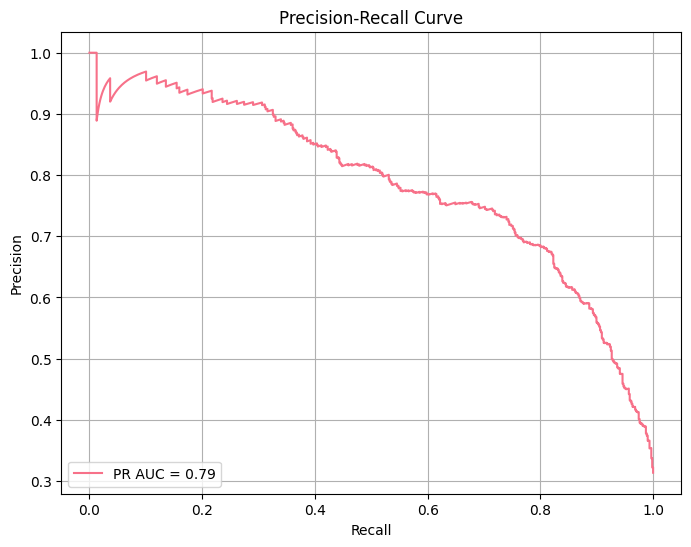

In [ ]:
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()